In [1]:
# Affichage
%matplotlib notebook
from IPython.display import display, HTML

# import standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Introduction

Our analysis will focus on a database containing 1500 music. The database was provided by one of our instructors and can be retrieved from Kaggle.com. The database concerns the musical preferences of a Spotify user: each music is annotated with a like or a dislike according to its tastes. Each music is described by 15 elements: properties,at once, quantifiable (loudness, duration, danceability,...) and by more descriptive properties like the title of the music or the artist. We haven't information about the genre of the music.

The dependent variable (appreciation or not of the music for this user in question) takes values in {0,1}: it is, therefore, a discrete binary variable. Thus, we will consider that this is a classification problem.
The objective is to predict if a music is appreciated or not by this user from the elements mentioned above.
We will begin with a descriptive analysis of the database to better understand the environment in which we will evolve during our study.
Then our work will be decomposed in 2 phases:

The first phase will mainly concern machine learning with the creation of classes to understand this problem.
The learning is broken down as follows:
- Realization of n test with p classifiers on our database.
- We recover the best that is to say the one with the best score taking into account the variance (and possibly the calculation time).
- The results of the best are analyzed.
This classic method allowed us to reach an average score of 75%.

The 2nd phase concerned the improvement of our prediction by the installation of feature engineering:
- Contribution of dimension reduction techniques
- Discretization of qualitative variables to take into account non-linear effects

# Part 1 

In this first part, we will see how using Python for descriptives issues. Moreover, it's always interesting, in a data science framework, to obtain modeling results quickly to have an idea of our "quality prediction". Therefore, it's what we will achieve in this part where we won't focus on preprocessing / feature engineering tasks (part 2). In addition, we will implement our first models accordint to the object-oriented programming (POO).

# Importation of the database

In [2]:
os.chdir('C:\\Users\\p095074\\Documents\\memoire\\') # Set working directory

train = pd.read_csv("train.csv", delimiter = ",", encoding = "UTF-8")
train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.640000,0.518,405027,0.385,0.000536,9,0.0931,-11.125,0,0.0286,100.878,4,0.2640,1,Billie Holiday,Warpaint
1,0.040600,0.536,238893,0.922,0.000089,2,0.2140,-6.247,1,0.0667,121.977,4,0.3680,1,Walkabout (W/ Noah Lennox),Atlas Sound
2,0.036400,0.549,202787,0.576,0.000002,9,0.1470,-6.282,1,0.0263,118.709,3,0.4620,0,Fuck You Bitch,Wheeler Walker Jr.
3,0.099800,0.666,285320,0.811,0.061400,11,0.0588,-5.079,0,0.0357,124.954,4,0.9550,1,How Do You Do?,Hot Chip
4,0.190000,0.776,239880,0.507,0.000000,9,0.1200,-5.752,0,0.0405,98.051,4,0.5100,0,Secret Love,JoJo
5,0.005930,0.608,187761,0.841,0.057300,0,0.1210,-3.798,1,0.0464,167.969,4,0.2500,0,Thunder,Imagine Dragons
6,0.017800,0.690,230792,0.841,0.790000,4,0.1370,-5.592,0,0.0868,130.052,4,0.5330,0,Rock The House - Radio Edit,Afrojack
7,0.289000,0.444,346360,0.978,0.778000,6,0.1710,-6.238,1,0.0998,125.371,4,0.4630,1,Play This (Also),J Rocc
8,0.151000,0.633,321627,0.850,0.000000,5,0.0556,-5.915,0,0.3440,97.933,4,0.7610,1,HLM 3,Lunatic
9,0.186000,0.548,272394,0.532,0.000263,5,0.2170,-7.596,1,0.0323,85.030,4,0.4280,0,Do I Wanna Know?,Arctic Monkeys


# Data manipulation

We will perform some manipulations on the data types

In [3]:
train.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [4]:
# convert variables 
for col in ['key', 'mode', 'time_signature', 'target', 'artist']:
    train[col] = train[col].astype('category')
    
train.dtypes

acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
speechiness          float64
tempo                float64
time_signature      category
valence              float64
target              category
song_title            object
artist              category
dtype: object

In [5]:
# valeurs manquantes 
missing_values = train.isnull().sum()
missing_values

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

The database has no missing values. It is important to point out that the treatment of missing values is one of the major problems that the data scientist faces, which can be complex to deal with.

# Descriptives statistics

## Summary of the database

In [6]:
train.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.193514,0.613903,2.470349e+05,0.679466,0.128731,0.190605,-7.086111,0.092742,121.709792,0.492930
std,0.266860,0.163288,8.436540e+04,0.213450,0.269100,0.158439,3.835345,0.091750,27.073358,0.248644
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.018800,-33.097000,0.023200,47.859000,0.035900
25%,0.009817,0.507750,1.992722e+05,0.561000,0.000000,0.092475,-8.376000,0.037300,100.030750,0.292000
50%,0.063950,0.628000,2.284670e+05,0.714000,0.000075,0.125000,-6.235000,0.054550,121.987500,0.484000
75%,0.267250,0.733250,2.718865e+05,0.844000,0.046025,0.241250,-4.722000,0.106000,137.897500,0.689250
max,0.995000,0.962000,1.004627e+06,0.998000,0.968000,0.969000,-0.307000,0.816000,209.686000,0.992000


The database contains 10 quantitative variables (after treatment of certain variables). Most of these variables take values between 0 and 1. This is not necessarily the case for the set: one might think that it would be better to consider the scaled variables.

## Distribution of the target variable

In [7]:
train["target"].value_counts()

1    759
0    741
Name: target, dtype: int64

In [8]:
target_tab = pd.crosstab(index=train["target"],
            columns="count")  

target_tab/target_tab.sum()

col_0,count
target,
1,0.506
0,0.494


The variable of interest is distributed in a completely symmetrical way: as many likes as dislikes. This was wanted by the creator of the base.

## what are the favorite artists and vice versa?

In [9]:
liked = train[train.target == 1]
disliked = train[train.target == 0]

In [10]:
liked_artist = liked["artist"].value_counts()[0:9] 
# same thing : liked["artist"].value_counts().head(9)

liked_artist

Drake              12
Disclosure         10
Crystal Castles     8
Young Thug          7
FIDLAR              7
Kanye West          7
Hot Chip            6
CHVRCHES            6
ScHoolboy Q         5
Name: artist, dtype: int64

In [11]:
disliked_artist = disliked["artist"].value_counts()[0:9]

disliked_artist

Backstreet Boys     9
Skrillex            7
Rick Ross           7
Fall Out Boy        6
Demi Lovato         6
Kina Grannis        5
The Chainsmokers    5
Owl City            5
Nickelback          5
Name: artist, dtype: int64

<IPython.core.display.Javascript object>


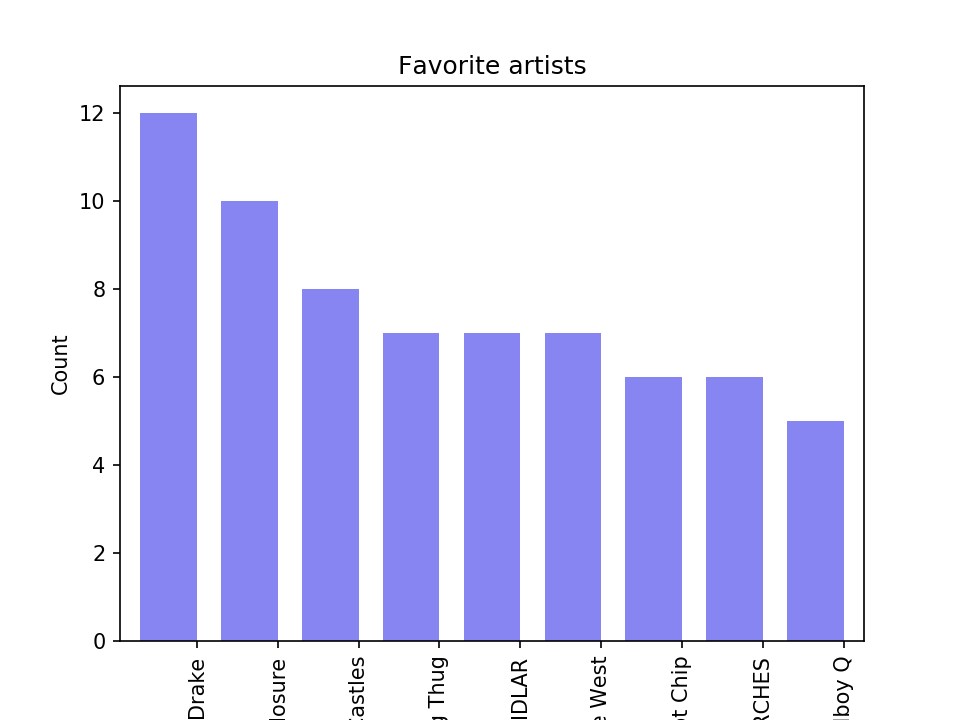

In [12]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.7

liked_artist.plot(kind='bar', color='#8685f2', ax=ax, width=width, position=1)
ax.set_ylabel('Count')

plt.title("Favorite artists")

plt.show()

Among the user's favorite artists, we find Drake, Kanye West, ScHoolboy Q or Young Thug who produce sounds belonging to the US rap.

<IPython.core.display.Javascript object>


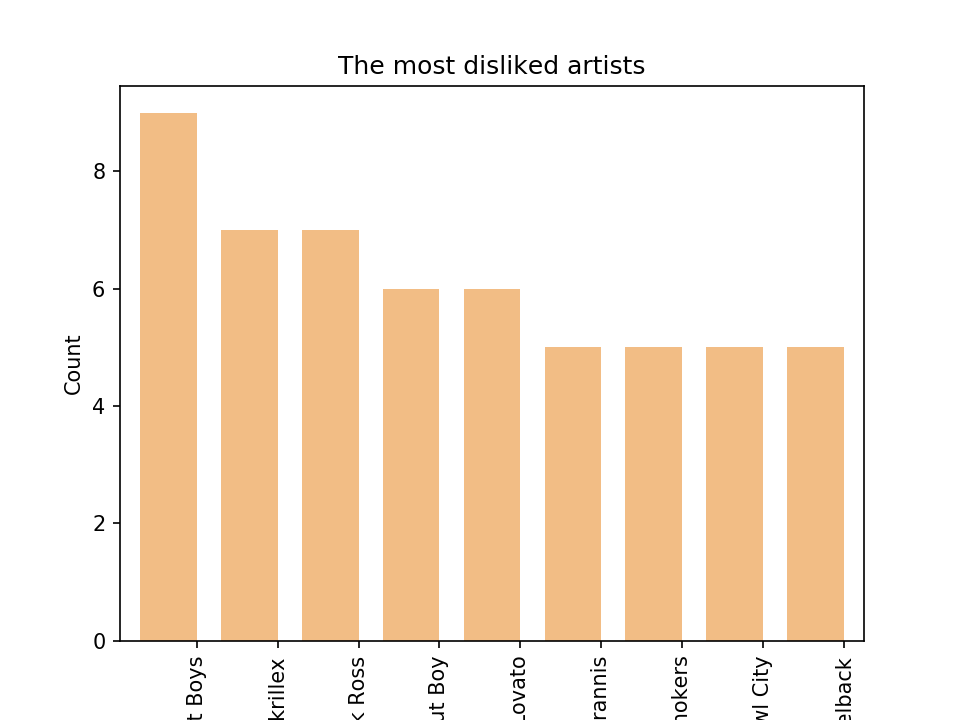

In [13]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.7

disliked_artist.plot(kind='bar', color='#f2bd85', ax=ax, width=width, position=1)
ax.set_ylabel('Count')

plt.title("The most disliked artists")

plt.show()

Conversely, there are a lot of pop and rock bands in the less popular artists like Backstreet Boys, Fall Out Boy or Nickelback.

## Correlation matrix

<IPython.core.display.Javascript object>


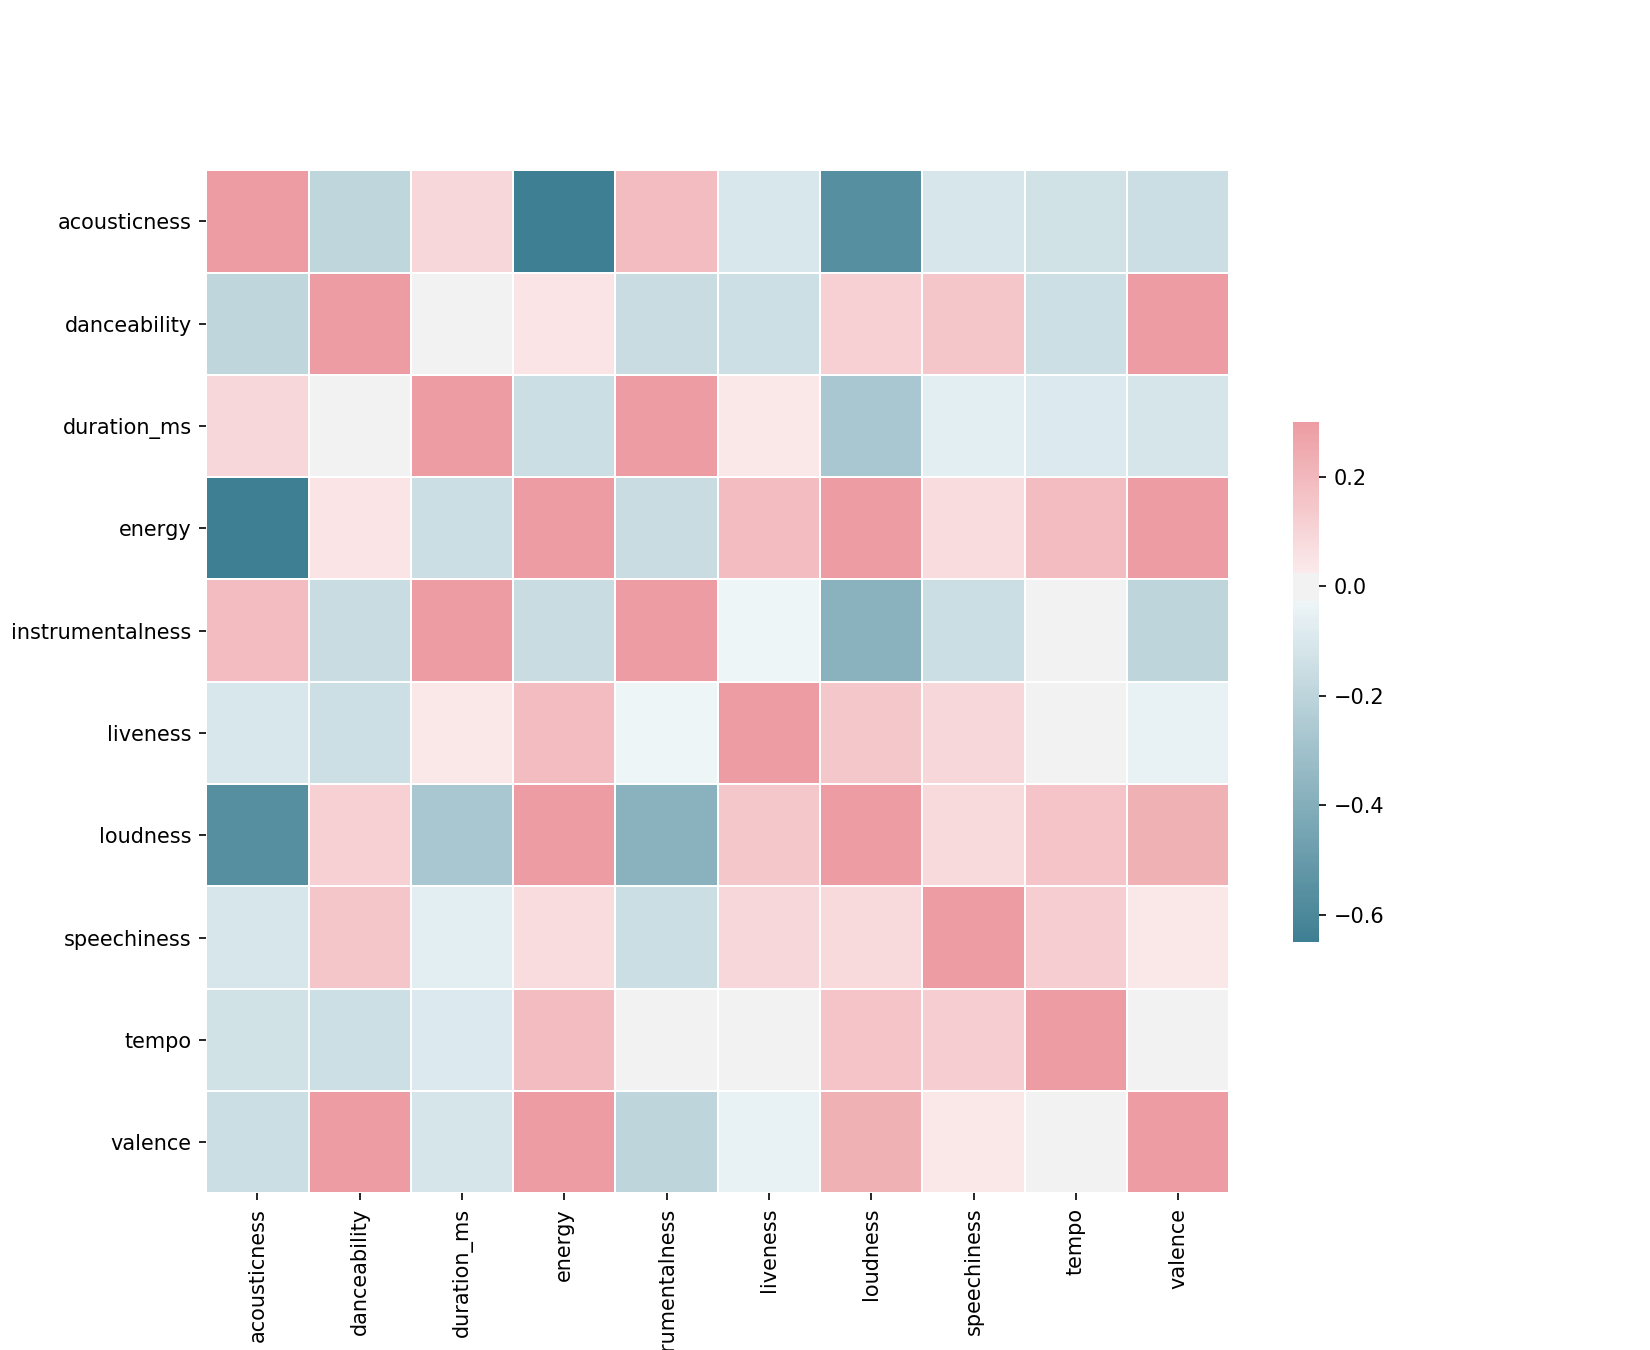

In [14]:
# correlation matrix

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation matrix is given above. Mostly, the variables seem uncorrelated (poorly correlated) with each other. The most relevant thing seems to be the strong negative correlation between the acousticness and the energy / loudness (and thus positive correlation between energy and loudness).

## Distribution of quantitative variables in relation to the target 

<IPython.core.display.Javascript object>


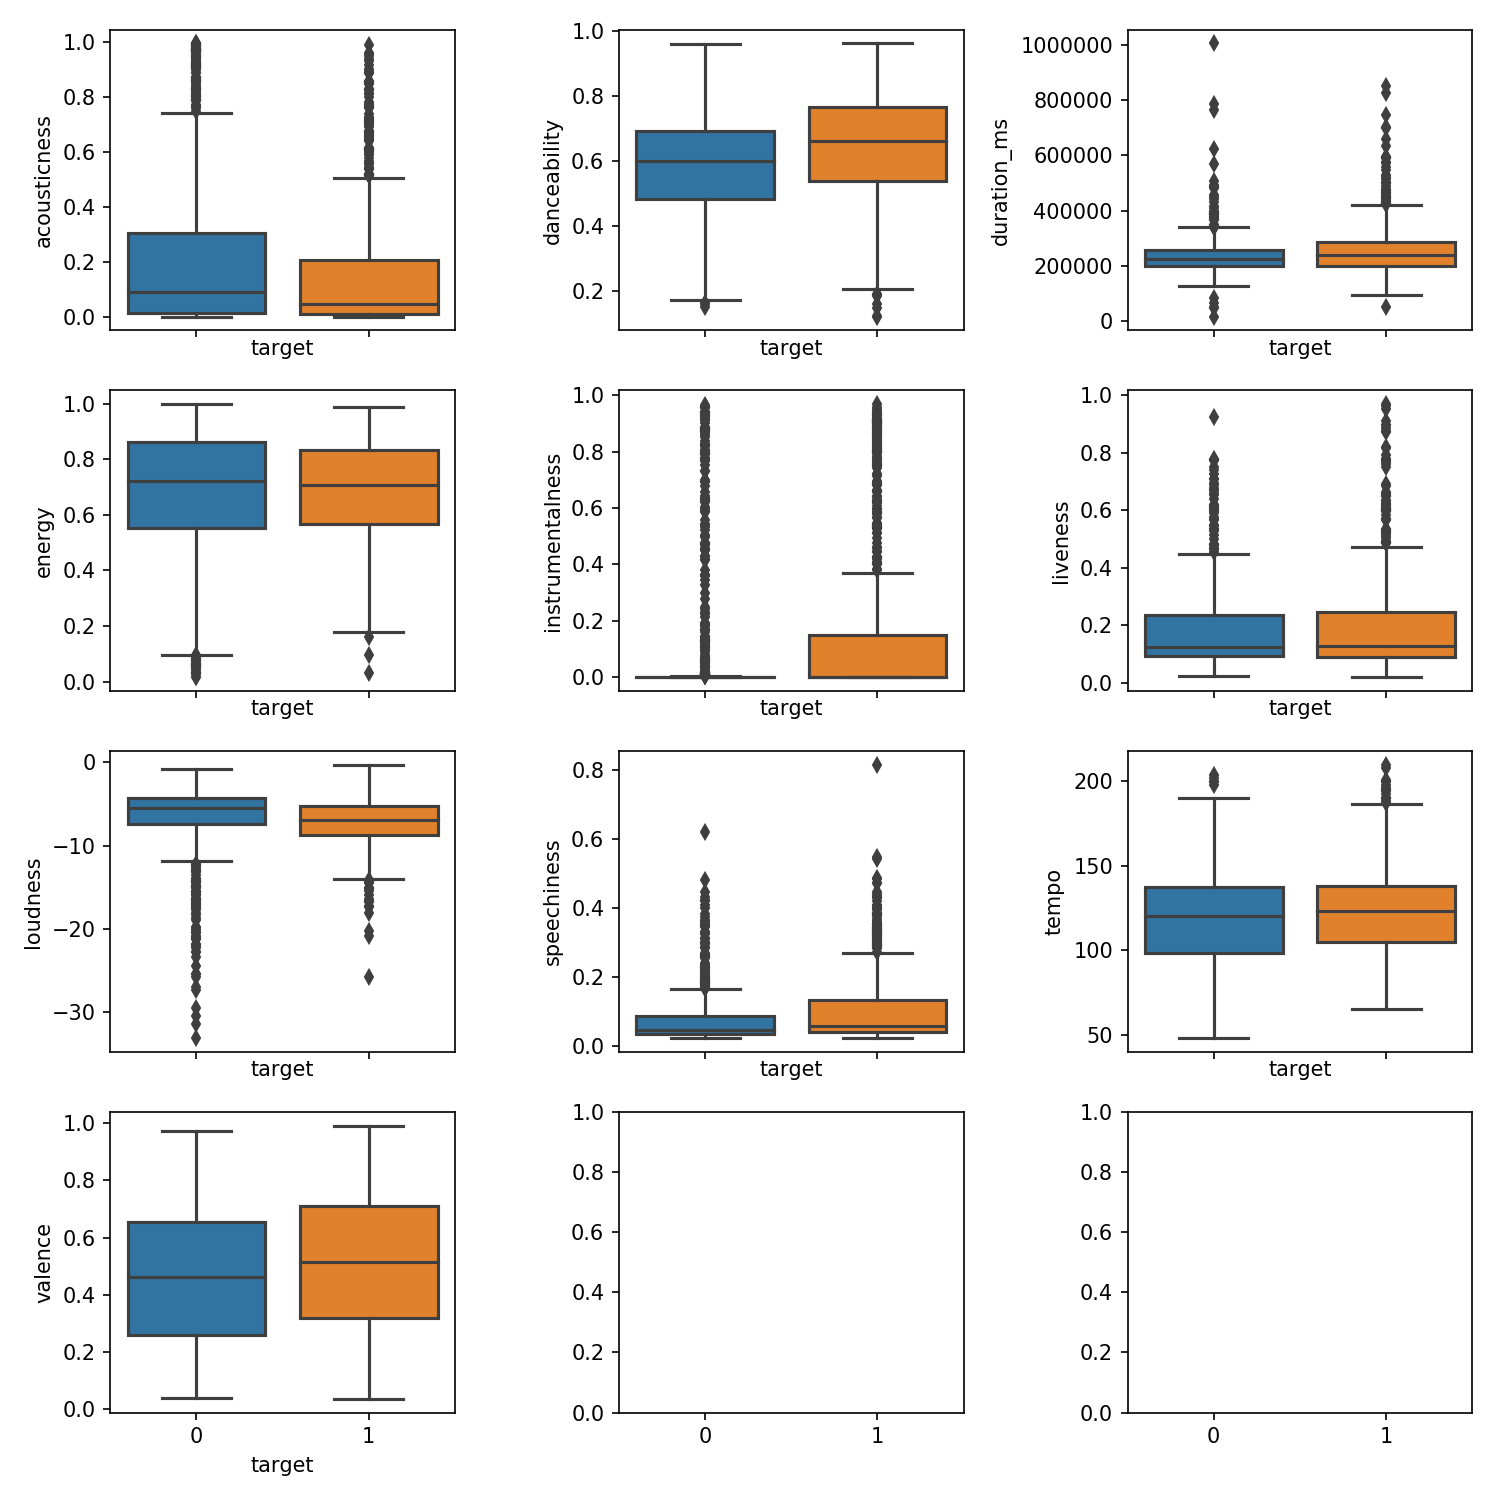

In [15]:
corr
type(corr)

# recuperate names colums of correlation matrix
names = corr.columns

# plot boxplot for each numerical variable 
fig, axes =plt.subplots(4,3, figsize=(10,10), sharex=True)
axes = axes.flatten()

for ax, catplot in zip(axes,train[names]):
    sns.boxplot(x = "target", y=catplot, data=train, ax=ax)

plt.tight_layout()  
plt.show()

The boxplots of the quantitative variables relative to the target are given above. The blue boxplots correspond to the user's dislikes while the orange ones represent the likes. 

It seems that the music at tempo, deanceability and valence levels are those preferred by the user. It would be interesting to check if these characteristics correspond to those of the US rap music as we explained previously.

Conversely, music with strong acousticness and loudness seem not to be appreciated by the user. This confirms the intuitions predicted by the previous graphs.

### An other vision of distribution of quantitative variables with respect to the target

<IPython.core.display.Javascript object>


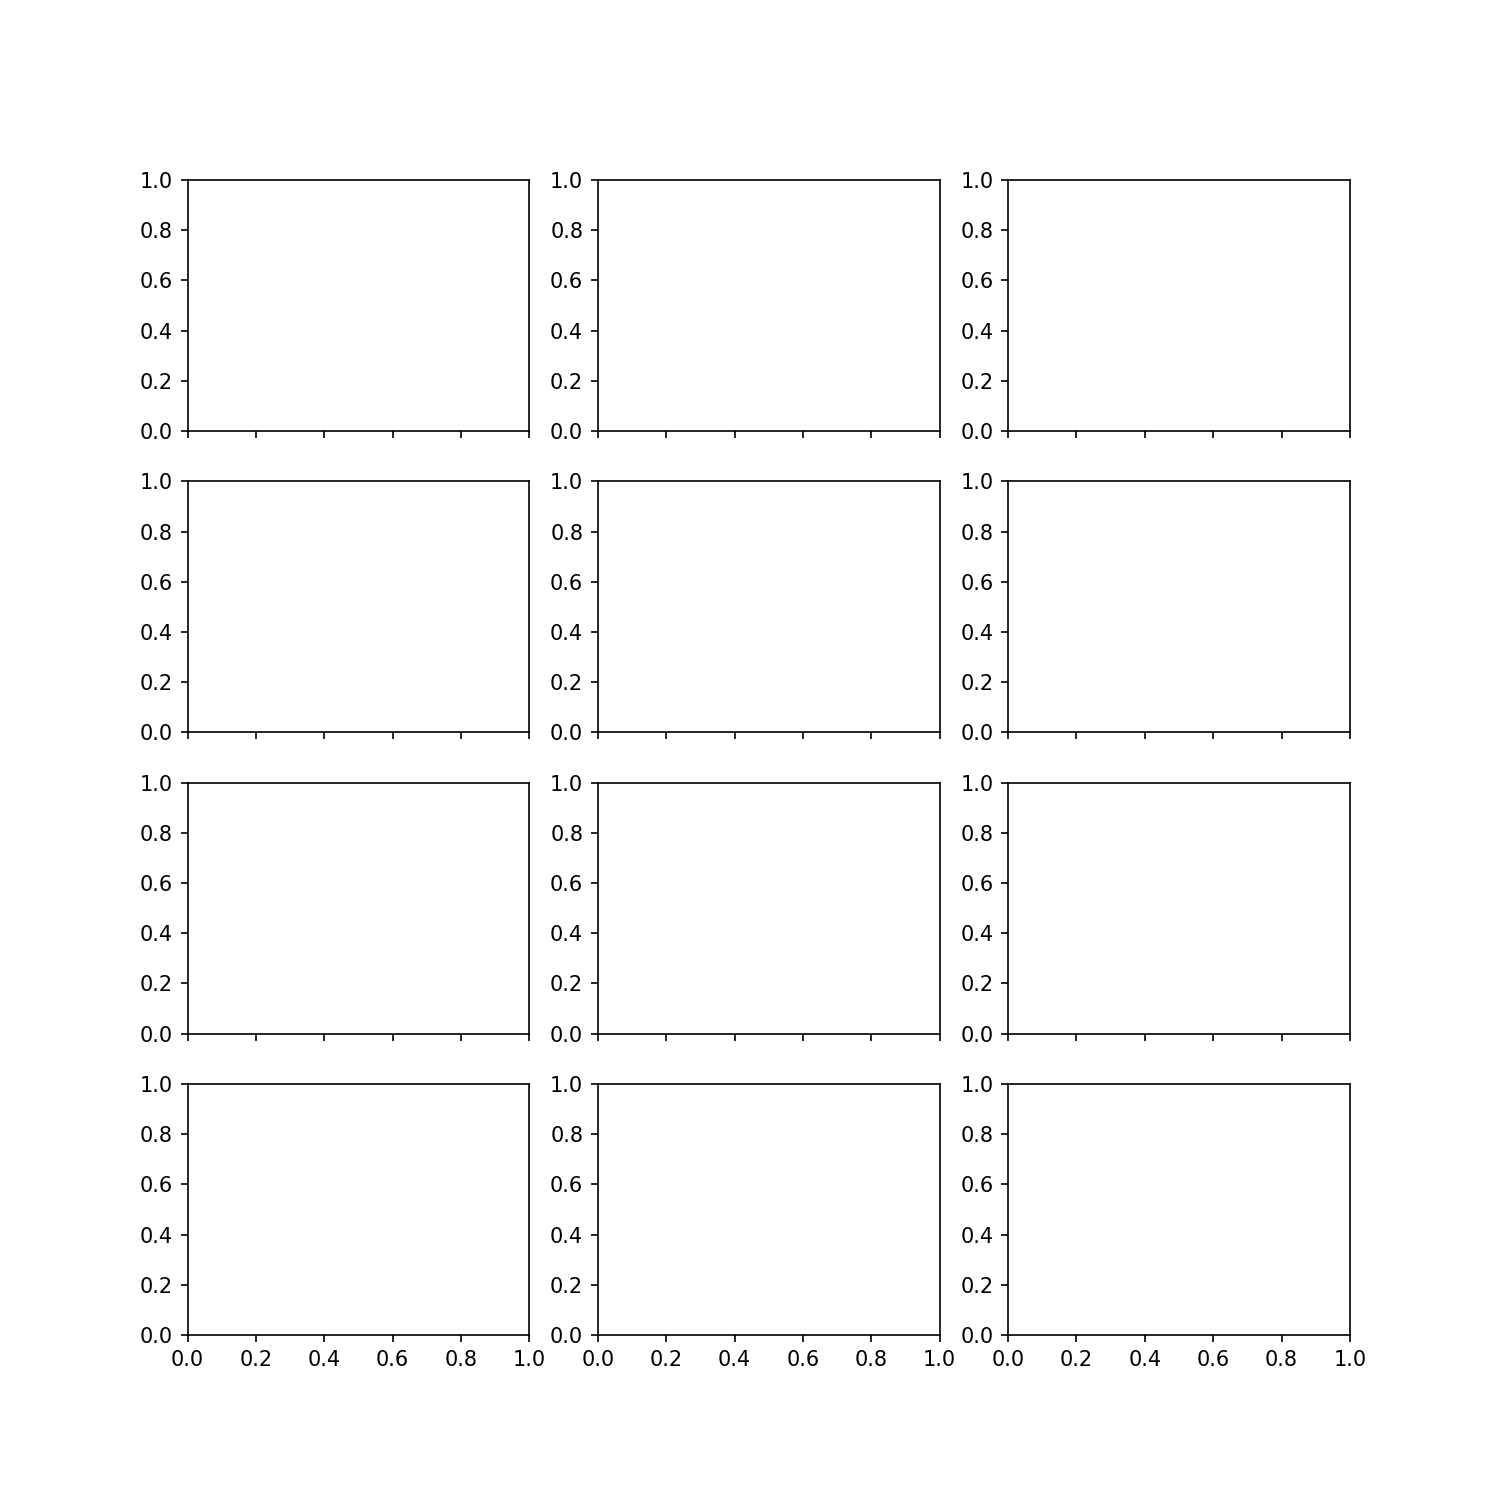

<IPython.core.display.Javascript object>


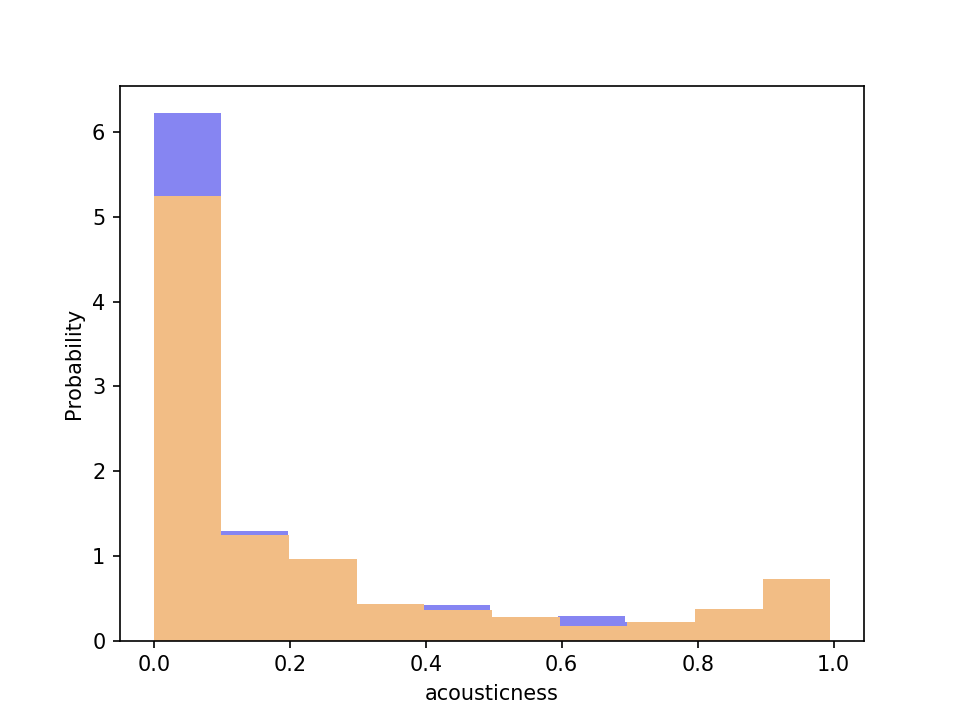

<IPython.core.display.Javascript object>


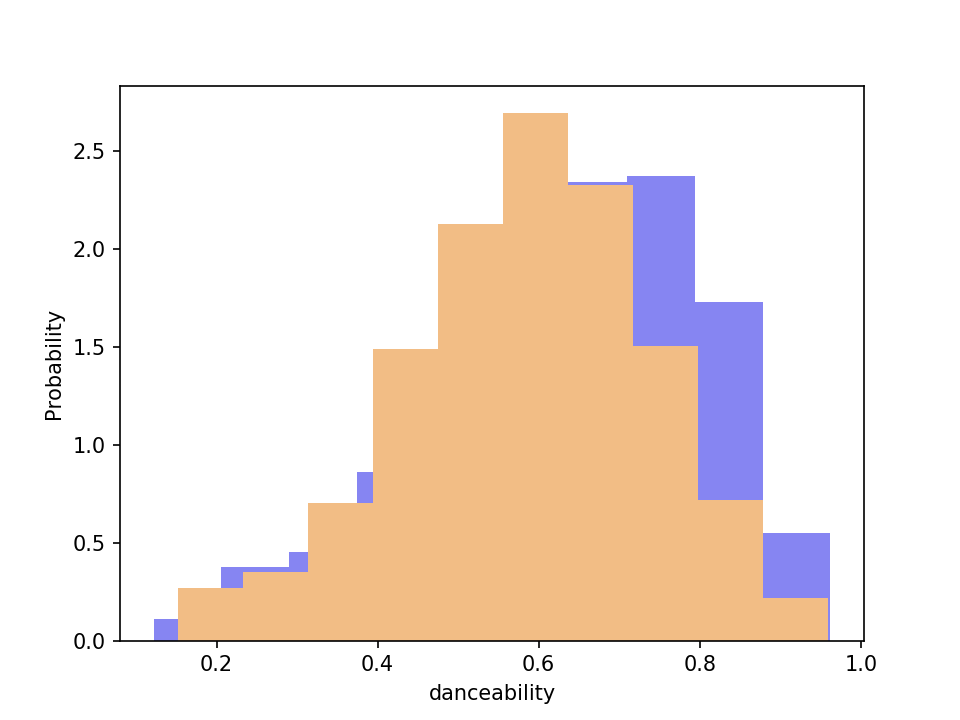

<IPython.core.display.Javascript object>


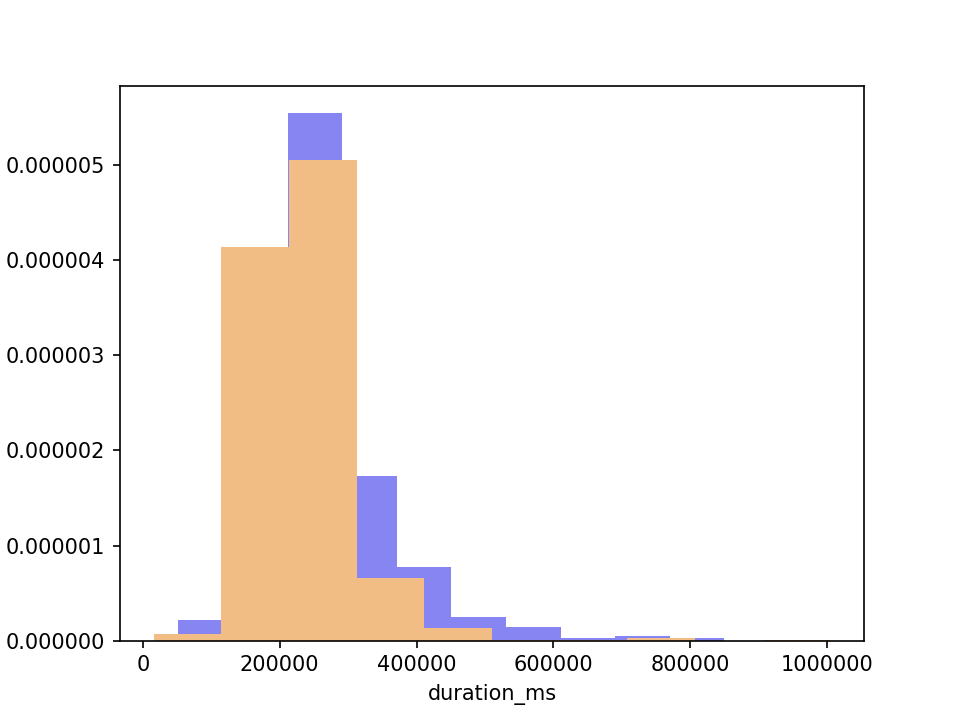

<IPython.core.display.Javascript object>


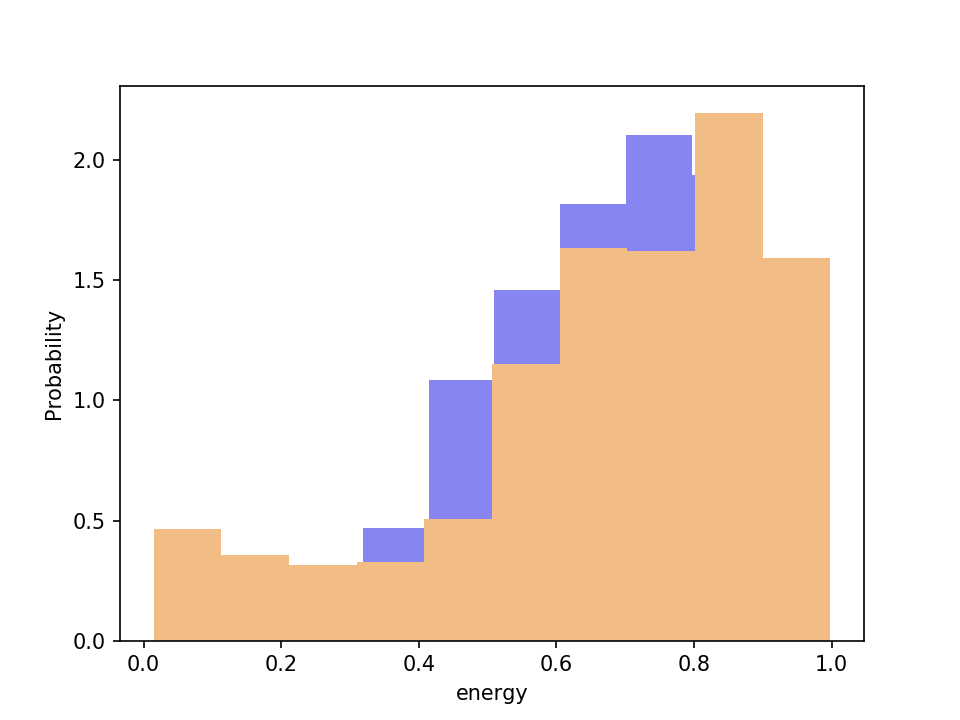

<IPython.core.display.Javascript object>


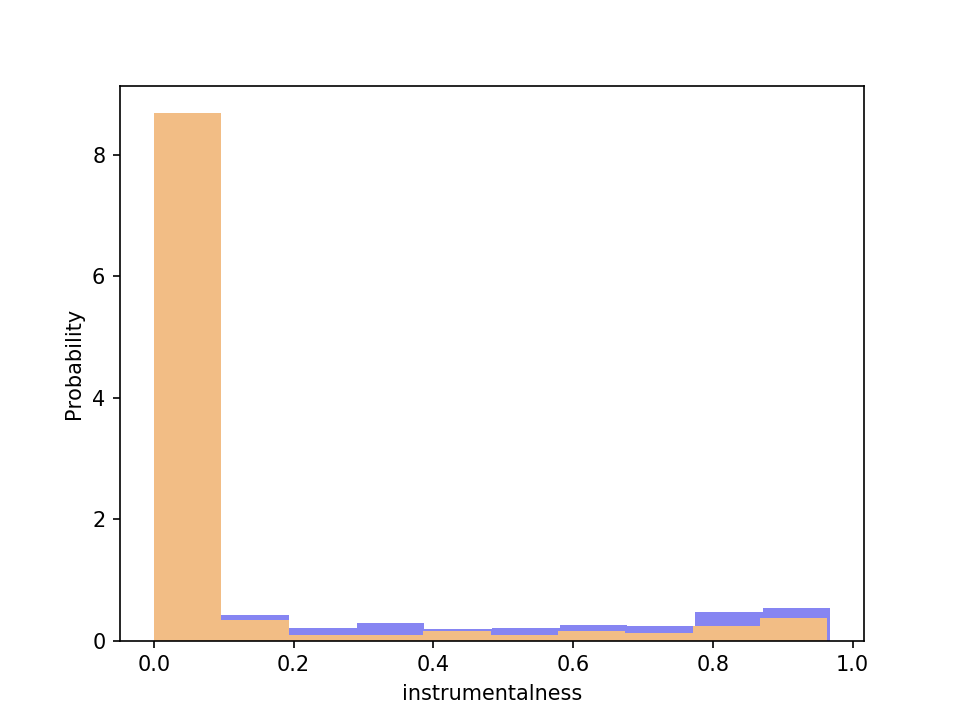

<IPython.core.display.Javascript object>


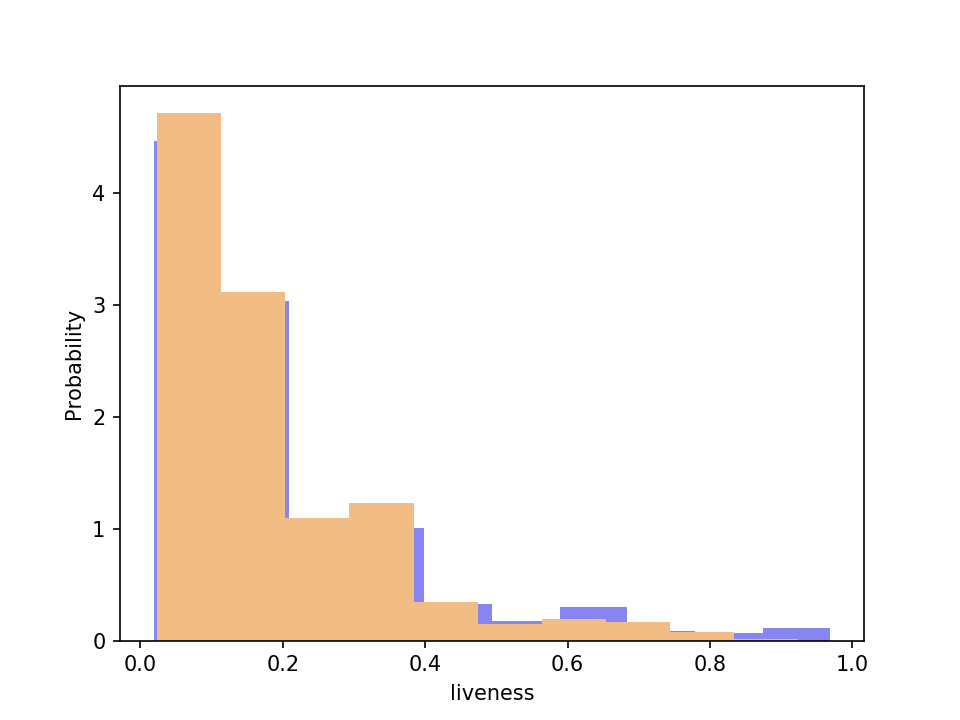

<IPython.core.display.Javascript object>


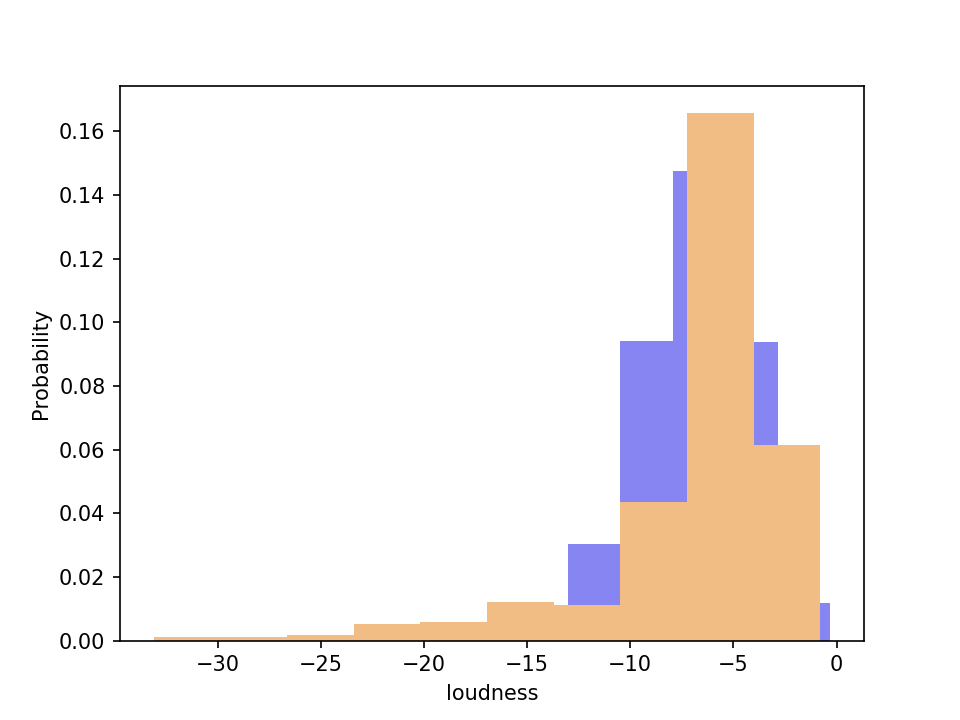

<IPython.core.display.Javascript object>


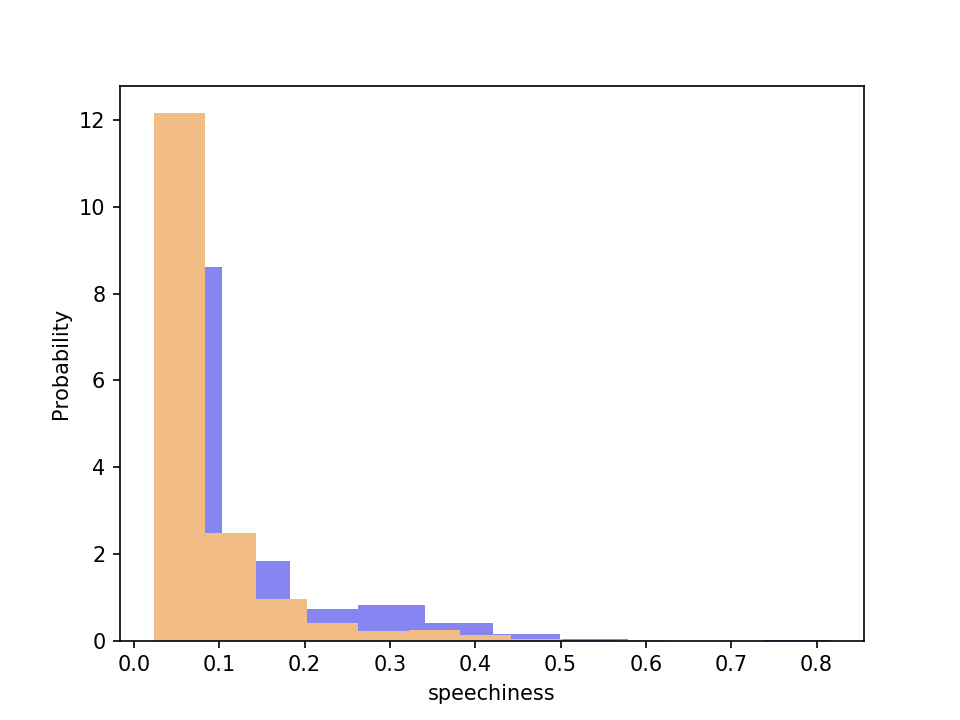

<IPython.core.display.Javascript object>


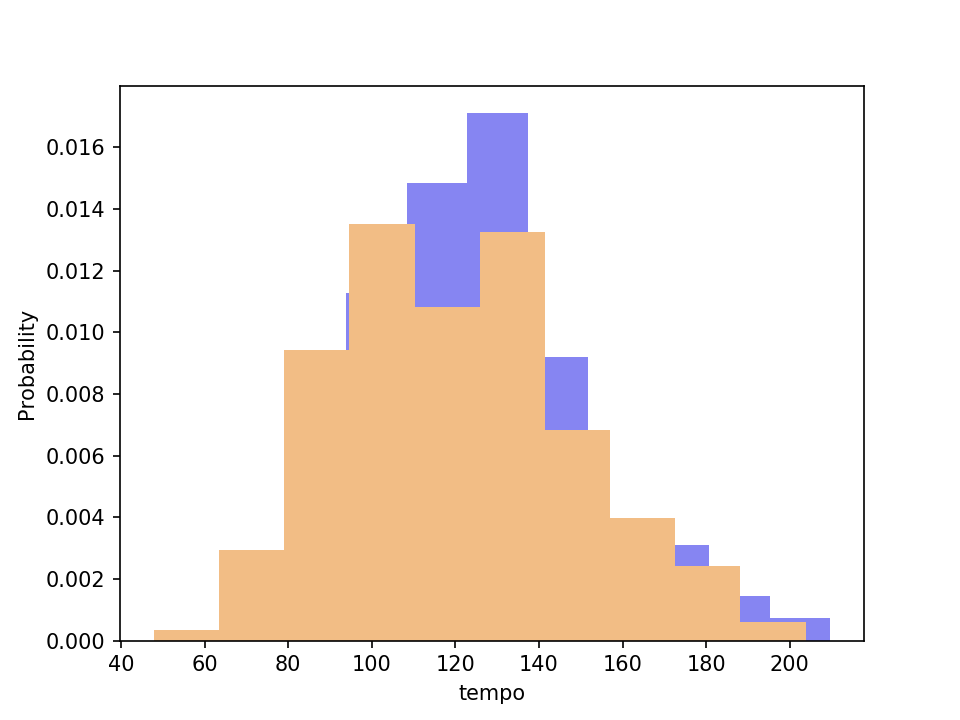

<IPython.core.display.Javascript object>


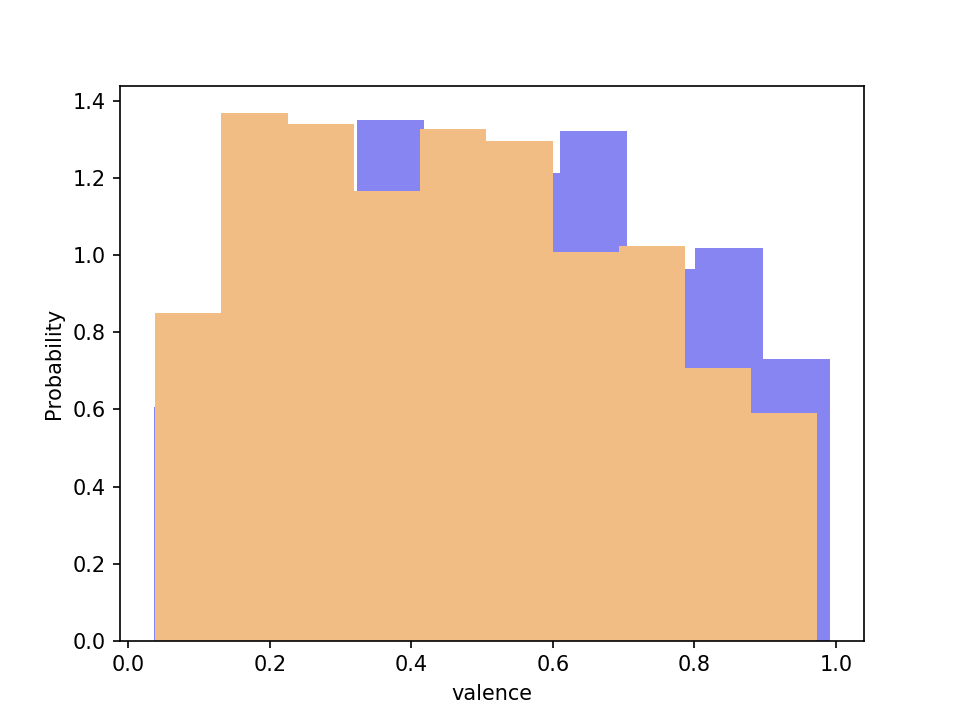

In [16]:
def graph(var):
    fig = plt.figure()

    plt.hist(train[(train['target'] == 1)][var],density=1, color="#8685f2") # Bleu
    plt.hist(train[(train['target'] == 0)][var],density=1, color="#f2bd85") # Rouge

    plt.xlabel(var)
    plt.ylabel('Probability')
    plt.show()
    
fig, axes =plt.subplots(4,3, figsize=(10,10), sharex=True)
for var in train[names]:
    graph(var)

## Treatment of influential values

Boxplots allow us to see the presence of influential values (rather than aberrant because we always stay in the range [0,1] for these quantitative variables). We choose to process values higher than the 0.975 order quantile of each. This order is fixed arbitrarily. We remain convinced that an influential value is not misinformation and therefore its treatment is not always justified. By setting a quantile at such a high order, we allow ourselves to deal only with the most extreme values, which is a small number of values, and thus to retain the initial distribution of each of our variables.

In [17]:
# replace extrem value for numeric
upper_quantiles = train.quantile(0.975)

outliers_high = (train[names] > upper_quantiles)

# replace extreme values
vars_to_replace = train[names].mask(outliers_high, upper_quantiles, axis=1)

for col in names :
    train[col] = vars_to_replace[col]
    
train.shape
train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.640000,0.518,405027,0.385000,0.000536,9,0.0931,-11.1250,0,0.028600,100.87800,4,0.2640,1,Billie Holiday,Warpaint
1,0.040600,0.536,238893,0.922000,0.000089,2,0.2140,-6.2470,1,0.066700,121.97700,4,0.3680,1,Walkabout (W/ Noah Lennox),Atlas Sound
2,0.036400,0.549,202787,0.576000,0.000002,9,0.1470,-6.2820,1,0.026300,118.70900,3,0.4620,0,Fuck You Bitch,Wheeler Walker Jr.
3,0.099800,0.666,285320,0.811000,0.061400,11,0.0588,-5.0790,0,0.035700,124.95400,4,0.9540,1,How Do You Do?,Hot Chip
4,0.190000,0.776,239880,0.507000,0.000000,9,0.1200,-5.7520,0,0.040500,98.05100,4,0.5100,0,Secret Love,JoJo
5,0.005930,0.608,187761,0.841000,0.057300,0,0.1210,-3.7980,1,0.046400,167.96900,4,0.2500,0,Thunder,Imagine Dragons
6,0.017800,0.690,230792,0.841000,0.790000,4,0.1370,-5.5920,0,0.086800,130.05200,4,0.5330,0,Rock The House - Radio Edit,Afrojack
7,0.289000,0.444,346360,0.974525,0.778000,6,0.1710,-6.2380,1,0.099800,125.37100,4,0.4630,1,Play This (Also),J Rocc
8,0.151000,0.633,321627,0.850000,0.000000,5,0.0556,-5.9150,0,0.344000,97.93300,4,0.7610,1,HLM 3,Lunatic
9,0.186000,0.548,272394,0.532000,0.000263,5,0.2170,-7.5960,1,0.032300,85.03000,4,0.4280,0,Do I Wanna Know?,Arctic Monkeys


In [18]:
def cross_tab(dataframe, id_col):
    col_names=['key','mode']
    datasets = {}
    for i in col_names:
        datasets['crosstab_{}'.format(i)] = pd.crosstab(dataframe[id_col], dataframe[i])
    return datasets

storage = cross_tab(train, "target")
storage.keys()

storage['crosstab_key']
storage['crosstab_mode']

mode,0,1
target,,
1,329,430
0,261,480


In [19]:
spotify = train

# drop variables that add noise : over-categorization (too many categories), imbalanced categories
spotify = spotify.drop(["song_title","artist"], axis = 1)
spotify

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.640000,0.518,405027,0.385000,0.000536,9,0.0931,-11.1250,0,0.028600,100.87800,4,0.2640,1
1,0.040600,0.536,238893,0.922000,0.000089,2,0.2140,-6.2470,1,0.066700,121.97700,4,0.3680,1
2,0.036400,0.549,202787,0.576000,0.000002,9,0.1470,-6.2820,1,0.026300,118.70900,3,0.4620,0
3,0.099800,0.666,285320,0.811000,0.061400,11,0.0588,-5.0790,0,0.035700,124.95400,4,0.9540,1
4,0.190000,0.776,239880,0.507000,0.000000,9,0.1200,-5.7520,0,0.040500,98.05100,4,0.5100,0
5,0.005930,0.608,187761,0.841000,0.057300,0,0.1210,-3.7980,1,0.046400,167.96900,4,0.2500,0
6,0.017800,0.690,230792,0.841000,0.790000,4,0.1370,-5.5920,0,0.086800,130.05200,4,0.5330,0
7,0.289000,0.444,346360,0.974525,0.778000,6,0.1710,-6.2380,1,0.099800,125.37100,4,0.4630,1
8,0.151000,0.633,321627,0.850000,0.000000,5,0.0556,-5.9150,0,0.344000,97.93300,4,0.7610,1
9,0.186000,0.548,272394,0.532000,0.000263,5,0.2170,-7.5960,1,0.032300,85.03000,4,0.4280,0


We decide to delete the columns related to the title of the music and to the artist which correspond mostly to unique cases and which risk to introduce noise in the modeling phase. 
Moreover, the categorical variable "time signature" is over-unbalanced (more than 95% of the values ​​in a single class).

# Modelisation

For the modeling phase, we decided to use the OOP (object-oriented programming) class concept to quickly test all the basic models. Indeed, the comparison of model performance is a major issue for today's data scientist. The idea was to propose a programming, both intuitive and optimal for this work. We have, therefore, create 3 classifiers.

In [20]:
# Standard module
import pickle

# Méthode de préprocessing utilisés
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Classifiers utilisés
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,\
                             AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


## Modules particuliers :
from boruta import BorutaPy 

## ClassifyTester:
This class is used to test several models on a specific splitted database. It returns classifierScore for each test and stores them.

In [21]:
#
#   Class to test quickly on a classifiers basis
#
class ClassifierTester:
    
    # Classifiers that we want to test
    clfs_name = [\
                "RandomForestClassifier",
                "SGDClassifier",
                "ExtraTreeClassifier",
                "RidgeClassifier",
                "SVC", 
                "KNeighborsClassifier",
                "AdaBoostClassifier",
                "GradientBoostingClassifier",
                "MLPClassifier"
           ]    
    
    # At the beginning, retrieves data and splits.
    def __init__(self, data, col):
        self.data = data # database
        self.col = col # output to predict
        self.scores = {} # store the results in differents classifiers
        
        self._split_normalize_data() # Split and normalize the data
        
#
#   Private functions for the analysis of data
#
        
    # Split and normalize the database between a train and a test
    def _split_normalize_data(self):
        # Reset results
        self.scores = {}
        
        # Split datas
        train, test = train_test_split(self.data)    

        # Split X, Y
        self.train_X, self.train_Y = train.drop(self.col, 1), train[self.col]
        self.test_X, self.test_Y = test.drop(self.col, 1), test[self.col]
        
        # Normalizing      
        # self.test_X = (self.test_X - self.train_X.mean())/self.train_X.std()
        # self.train_X = (self.train_X - self.train_X.mean())/self.train_X.std()
    
        
        return self
    
    # Test a classifier (clf) on features (feat_selector) of the database
    # Return a ClassifierScore
    def _test(self, clf, feat_selector = None, suffixe = ""):
        
        # Retrieves the columns selected
        if feat_selector is None:
            feats_selected = self.train_X.columns
        else:
            feats_selected = [i for indx,i in enumerate(self.train_X.columns) if feat_selector[indx]]
        
        # Train the classifier on feats_selected
        selected_train = self.train_X[feats_selected]
        clf.fit(selected_train,self.train_Y)

        # Create and store the score of the classifier
        score = ClassifierScore(clf, feats_selected, self.test_X, self.test_Y, suffixe)
        self.scores[score.name] = score
        return score
    
    # Return the features optimized for the classifier
    # For the boruta method, only works for sklearn.ensemble
    def _boruta_selector(self, clf):
        feat_selector = BorutaPy(clf, n_estimators=100, verbose=0, random_state=1)
        feat_selector.fit(self.train_X.values, self.train_Y.ravel())
        return feat_selector.support_
    
    def _has_boruta(self, clf):
        return ("RandomForest" in str(type(clf)))
    
    
#
#  Interface functions
#
    
    # Test the classifier with the boruta if it is possible
    # Return a ClassifierScore
    def test(self, clf, boruta = False):
        
        # Simple test with all features
        score = self._test(clf)
        
        # Try to implement the boruta if it is asked
        if boruta and self._has_boruta(clf):
            try:
                # We add the suffix in order to not crush the other score
                score = self._test(clf, self._boruta_selector(clf), "_Boruta")
            except:
                print("Boruta failed...")
        
        return score
        
        # Test all classifiers in reserve
    def full_test(self, clfs_name = None, boruta = False):

        if clfs_name == None : clfs_name =  self.__class__.clfs_name
        
        # Test all classifiers
        for clf_name in clfs_name:
            clf = eval(clf_name + "()") # Create the classifier
            self.test(clf, boruta = boruta) # Test the classifier and store the result
        
        return self
    
    def get_dict_score(self):
        res = {}
        for key, value in self.scores.items():
            res[key] = value.score
        return res
    
#
#  Display functions
#      

    # Display all scores stored
    def __str__(self):
        s = ""
        for name, score in self.scores.items():
            s += str(score) + "\n"
        return s
    
    def __repr__(self):
        return self.__str__()
    
#
#  Other functions
#

    def __getitem__(self, key):
        if key not in self.scores:
            raise ValueError("'"+key+"'is not in the score !")
        return self.scores[key]

## ClassifyScore:
This class stores the result of the classification. It keeps the basis on which the classification was made and the score. It allows to properly display the results of all the tests for the classifyNTester.

In [22]:
class ClassifierScore:
    
    def __init__(self, clf, feats_selected, X, Y, suffixe = ""):
        self.clf = clf
        self.feats_selected = feats_selected
        self.X = X
        self.X_selected = self.X[feats_selected]
        self.Y = Y
        self.Y_pred = clf.predict(self.X_selected)
        self.name = str(type(self.clf).__name__) + str(suffixe)
        
        self.feats_removed = [c for c in X.columns if (c not in feats_selected)]
        
        self._compute()
        
    # Compute the scores
    def _compute(self):
        self.score_random = 1/self.Y.nunique()
        self.score = self.clf.score(self.X_selected, self.Y)
        self.score_diff = (self.score/self.score_random) - 1
        
        print(self.name + " computed ! ("+self._to_per(self.score)+")")
        
    def cross_validation(self):
        return confusion_matrix(self.Y, self.Y_pred)
        
#
#  Display
#      
    def __str__(self):
        res = "Résultat pour " + self.name + "\n"
        res += "Score minimum significatif : " + self._to_per(self.score_random) + "\n"
        res += "Score de la classification : " + self._to_per(self.score) + "\n"
        res += "Amélioration de " + self._to_per(self.score_diff) + "\n"
        res += "Colonne éliminée : " +  ("Aucune" if len(self.feats_removed) == 0 else ", ".join(self.feats_removed)) + "\n"
        res += "Colonne gardée : " +  ("Aucune" if len(self.feats_selected) == 0 else ", ".join(self.feats_selected)) + "\n"

        return res
    
    def __repr__(self):
        return self.__str__()
    
#
#  Utilities
#
    def _to_per(self, p):
        return str(round(100*p,2)) + "%"

## Classify NTester:
This class permits to perform a test of several classifiers. The goal is to determine which classifications are the most stable and the most effective.
It also allows you to cache previous calculations. This avoids to recalculate each time the n classifications.

In [23]:
class NClassifierTester:
    folder = "C:\\Users\\p095074\\Documents\\memoire\\data\\" # File where the results are stored
        
        
    # Test n times for all classifiers in clfs 
    # name : name of the test (used for the name of pickle)
    # data : database for the test
    # column : column to predict
    # n : Number of test to do 
    # clfs : Classifiers to test
    # boruta : if we use the boruta 
    # over : if we replace the cache
    def test(self, name, data, column, n = 10, clfs = ClassifierTester.clfs_name, boruta = False, over = False):
        # Retrieves the cache
        cache = pd.DataFrame() if over else self._load_cache(name)
            
        # Compute the number of tests remaining to do with the cache
        n_done = len(cache.index)
        n_todo = n - n_done
        
        if n_todo > 0:
            # Do the n tests
            for i in range(n_todo):   
                print("Iteration : "+ str(i+1) + "/" + str(n_todo))
                tester = ClassifierTester(data, column)
                tester.full_test(clfs, boruta)
                
                scores = tester.get_dict_score()
                
        # Fusion the new test in the Dataframe 
                cache = cache.append(scores, ignore_index=True)
                # Save the cache
                self._save_cache(name, cache)
                
                ## We hide at each stage for the boruta 
        
        self.show(name)
        return cache
    
      
    # Show the mean and the standard deviation of the analysis name 
    def show(self, name):
        df = self._load_cache(name)
        
        ms = df.mean().sort_values(ascending = False)*100
        stds = df.std()*100

        data = np.array([ms.values, stds[ms.index].values]).transpose()
   
        print(name + " including "+str(len(df.index))+" tests :")   
        display(pd.DataFrame(data, index = ms.index, columns = ["Mean", "Standard deviation"])) 
        

#
# Cache gestion
#
    
    # Load the cache if it exists or returns a empty dataframe
    def _load_cache(self, name):
        path_file = self.__class__.folder + name + ".pickle"
        if os.path.isfile(path_file):
            return pickle.load( open(path_file, "rb" ) )     
        else:
            return pd.DataFrame()
        
        
    # Save the cache 
    def _save_cache(self, name, cache):
        path_file = self.__class__.folder + name + ".pickle"
        pickle.dump( cache, open(path_file, "wb" ) )
        return self

# Prediction of the target

We try to predict the target that corresponds to the musical tastes of the user from the musical characteristics.

In [24]:
NTester = NClassifierTester()
df = NTester.test("origin_base_boruta_target", spotify, "target", n = 100, boruta = False)

origin_base_boruta_target including 100 tests :


,Mean,Standard deviation
GradientBoostingClassifier,75.443333,2.191226
RandomForestClassifier,72.473333,2.309003
AdaBoostClassifier,71.736667,2.179537
RidgeClassifier,64.290000,2.996689
ExtraTreeClassifier,62.133333,3.433185
KNeighborsClassifier,57.586667,2.476883
SGDClassifier,50.273333,2.462459
MLPClassifier,50.046667,2.477291
SVC,49.130000,1.559083


There is a ceiling of 75% with Gradient Boosting and a Boruta on the database. The standard deviation is 2.1% which is relatively correct. We are tempted to say that the classifier is therefore stable.

Note that Gradient Boosting is better. We will therefore use only this algorithm to refine our prediction.

Note: We did not perform tuning of the hyperparameters. It is therefore assumed that tuning would not change classifiers' rankings with roughly similar gains. This assumption is not strong since tuning usually yields 2-3% and our classifiers have deviations of more than 3%.

## Score details

In [25]:
# score details
tester = ClassifierTester(spotify, "target")
score_details = tester.test(GradientBoostingClassifier(), boruta = True)
score_details

GradientBoostingClassifier computed ! (77.33%)


Résultat pour GradientBoostingClassifier
Score minimum significatif : 50.0%
Score de la classification : 77.33%
Amélioration de 54.67%
Colonne éliminée : Aucune
Colonne gardée : acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence

We can see that no variable has been eliminated by Boruta. It will be interesting to compare this result when we introduce our feature engineering in phase 2.

In [26]:
# confusion matrix
score_details.cross_validation()

array([[139,  39],
       [ 46, 151]], dtype=int64)

# Part 2

In this part, we will focus on preprocessing and feature engineering. We will essentially use the scikit learn library that we will try to explore on an exhaustif way : use of the different classifiers, pipeline coding, random and grid search to find the best parameters,...
    
Let's imagine that we are a data scientist consultant which has to asnwer to the following issue : "You will find in csv an extract of a famous music streaming platform. This extract represents the activity of a user on the platform for a week. The question is: how to use the data to keep a user as long as possible? The goal is not only to have longer use sessions (from 1h per day of listening to 2h for example) but also to prevent the client consumes music via another channel (radio, competitor streaming site, physical purchase)"

We start by splitting the database. Given the low volume, we will focus on the learning sample, retaining 90% of the initial database. We will test the quality of our predictions on 150 observations (10% of the database). 

Note that we will leave out the test sample and we will use it only to test the quality of our model. Indeed, by not using the test sample, we will allow us to suppress the data snooping bias that tends to give us the illusion of a "successful" model on this particular test sample.

Remember that our priority lies on the quality of prediction : we want to be able to define whether a music will satisfy the user or not to keep him on the streaming platform. We are, therefore, in an objective performance rather than explanation of our descriptive variables.

In [27]:
train = pd.read_csv("train.csv", delimiter = ",", encoding = "UTF-8")

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.1, random_state=42)

In [29]:
train_set = train_set.drop(["song_title","artist"], axis = 1)
test_set = test_set.drop(["song_title","artist"], axis = 1)

In [30]:
train_spotify = train_set.drop("target", axis = 1) # drop labels for training set
train_labels = train_set['target'].copy() # copy the labels

In [31]:
test_spotify = test_set.drop("target", axis = 1) # drop labels for training set
test_labels = test_set['target'].copy() # copy the labels

We will distinguish the numeric variables from the categorical variables.

The idea is to carry out treatments to improve the predictive quality of our models. For example, SVMs are highly sensitive to extreme values and to variables with different scales because they work on the establishment of separatory margins (more or less rigid depending on the parameters). Thus, we will carry out a center-reduction of our quantitative variables in order to overcome this problem thanks to scikit-learn's StandardScaler. In addition, we will perform a discretization of these same variables that we will add to our initial dataset using KBinsDiscretizer. We will perform this manipulation to capture the existing non-linear effects (note that this treatment occurs before normalization). The results are numpy tables.

For qualitative variables, we will binarize our variables (1/0 coding). Indeed, one of the problems of the learning algorithms is to consider that 2 neighboring values are more similar than 2 distant values. This is not necessarily the case. In particular, this differentiates categorized categorical variables ("very satisfied, satisfied, unsatisfactory, very unsatisfactory") from unordered categorical variables (eye color: "brown, blue, yellow"). To solve this problem, we create a binary variable per modality. This is what we call one-hot-encoding. The result is also a numpy array.

Please note that you can use category_encoders from scikit-learn to offer mutliple choices of encoding. The difference is in the type of the ouput returned. Category_encoders return a dataframe.

In [32]:
train_spotify_num = train_spotify.drop(['key', 'mode', 'time_signature'], axis = 1)
train_spotify_cat = train_spotify[['key','time_signature']]

In [33]:
pd.isnull(train_spotify_cat).sum()

key               0
time_signature    0
dtype: int64

In [34]:
import category_encoders as ce # offers multiples choices of encoding 

encoder = ce.one_hot.OneHotEncoder(cols = ['key', 'time_signature'])
A = encoder.fit_transform(train_spotify_cat)
A = A[A.columns.drop(list(A.filter(regex = "-1")))]
A

,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,key_12,time_signature_1,time_signature_2,time_signature_3,time_signature_4
1358,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1203,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
970,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1466,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
526,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1425,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1170,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
175,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
358,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
43,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(train_spotify_num)
cat_attribs = list(train_spotify_cat)

old_dis_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('discretizer', KBinsDiscretizer(n_bins = 5, encode= 'ordinal', strategy = 'kmeans'))
    ])

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler())
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse = False)),
    ])

In [37]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("disc_pipeline", old_dis_pipeline),    
        ("cat_pipeline", old_cat_pipeline)
    ], n_jobs = 1)

In [38]:
train_spotify_prepared = old_full_pipeline.fit_transform(train_spotify)

In [39]:
train_spotify_prepared.shape

(1350, 36)

In [40]:
disc_attribs = list(train_spotify_num.add_suffix('_disc'))
cat_onehot_attribs = list(A.columns)

train_spotify_prepared = pd.DataFrame(train_spotify_prepared, columns = num_attribs + disc_attribs + cat_onehot_attribs)
train_spotify_prepared.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_7,key_8,key_9,key_10,key_11,key_12,time_signature_1,time_signature_2,time_signature_3,time_signature_4
0,-0.512606,-0.186703,-0.022075,0.449896,-0.481292,0.696186,0.309881,-0.519379,-1.603610,-0.252619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.164093,0.886317,-0.829745,-1.752986,-0.481291,0.658251,-1.105936,-0.708563,-0.784740,-1.360831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.514477,1.364578,-0.621535,-0.663188,2.497246,-0.574004,-1.190668,0.238437,0.033795,-0.548954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.388661,-0.168309,-0.215793,-0.462926,-0.481321,-0.687809,-0.191511,-0.721535,0.630234,-0.000938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.266330,0.506161,-0.115555,0.529069,-0.481321,-0.691602,0.456542,0.119522,0.330098,-0.130838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.616656,-0.149914,-0.217072,-0.141575,-0.481321,-0.359671,0.096887,-0.564783,-1.156477,-0.041531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.437318,0.254768,0.170027,-1.040426,-0.481321,-0.617629,-0.472394,-0.642619,-0.211300,-1.263406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-0.623767,0.420320,-0.614958,-0.355809,-0.480162,0.007034,-0.267692,0.053578,-1.491483,0.064013,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,-0.634996,0.046295,-0.215624,0.962194,-0.481321,0.361094,1.049402,-0.578837,-1.081341,0.806880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-0.721866,-0.744674,-0.932867,1.241630,-0.481321,1.315791,1.123769,-0.326952,-0.657578,0.896186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
np.any(np.isnan(train_spotify_prepared))

False

### Machine Learning 

For the machine learning phase, we are going to pick up some classifiers already tested with Boruta (in particular the Adaboost and the GradientBoosting which are among the best performing classifiers).

In order to try to optimize the predictive quality of the models, the tuning step is important. It does not significantly increase the rate of good predictions of a model. For example, if the Adaboost classifier gives about 70% good predictions without optimization of the parameters, its parameterization should make it possible to be able to glean some points of percentages and thus to pass towards the 73-74% (at best), which is not negligible . 

In order to optimize the search for the optimal parameters in terms of prediction performance, we will proceed as follows: we will start grid searches using the scikit-learn RandomizedSearchCV and GridSearchCV modules that allow us to test different combinations parameters until you find the best performer. The idea here is to test, at first, a random search among the combinations tested (at each iteration, a value of the parameter is chosen randomly) by indicating the number of iterations - this makes it possible in particular to test a a very exhaustive number of combinations without suffering from the algorithmic complexity of the method. Then, once the first optimal parameters obtained randomly, we will conduct a targeted grid search around the value found previously. 

Moreover, it should be emphasized that we will carry out a resampling technique through cross-validation which limits the risk of over-learning. Here, we will build 10 blocks of validations where the model learns on 9 blocks at each iteration and tests on the last remaining block. At the end of the 10 iterations, an average of the different prediction results is calculated and constitutes the referent result. Note that the cross-validation prediction results are an estimate of the rate of good predictions (parameter of the accuracy chosen here) which tends to underestimate the errors made by the model. In other words, the results obtained by cross validation are theoretically the best we could obtain concretely (gives an idea of the best possible results). 

We will save the tested models at the end for the last modeling phase.

#### GradientBoosting Classifier

The GradientBoosting algorithm is one of the most popular boosting methods. The boosting was initially called "hypothesis boosting", that is to say, reinforcement by the hypothesis. 

Boosting refers to any set-up method that can combine several "bad students" into a "good student". The general idea of boosting is to train predictors one after the other, each striving to correct its predecessor. Adaboost is also part of boosting techniques. 

The GradientBoosting, belonging to the set-up boosting methods, does not break the rule: it works by sequentially adding predictors to a set, each of them seeking to correct its predecessor. Thus, the GradientBoosting will attempt to adjust its new predictor based on the residual errors of the previous predictor.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier

param_distribs = {
        'max_depth' : [1, 2, 3],
        'learning_rate': np.arange(0.1, 0.9, 0.05).tolist(),
        'n_estimators': np.arange(100, 250, 1).tolist()
    }

gradient_clf = GradientBoostingClassifier(random_state=42)
grid_search = RandomizedSearchCV(gradient_clf, param_distribs, cv=10, n_iter = 50, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3], 'learning_rate': [0.1, 0.15000000000000002, 0.20000000000000004, 0.25000000000000006, 0.30000000000000004, 0.3500000000000001, 0.40000000000000013, 0.45000000000000007, 0.5000000000000001, 0.5500000000000002, 0.6000000000000002, 0.6500000000000001, 0.7000...230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 2

In [43]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.755 
Best parameters: {'n_estimators': 176, 'max_depth': 2, 'learning_rate': 0.1}


The following code shows an GradientBoosting classifier testing 180 to 190 decision trees using the sickit-learn GradientBoosting class. The decision strain here is a decision tree where the max_depth = 2, ie a tree consisting of two levels of decision node (3 discriminating variables per tree).

We also do a grid search of the learning_rate hyperparameter which controls the contribution of each tree: the lower the learning rate, the more trees will be needed overall to adjust the dataset (but predictions will become more general - compromise bias variance). It is a technique of regularization of the model called shrinkage.

We voluntarily choose to regulate each tree by its depth and its contribution. The number of trees trained remains relatively high given the volume of training (187 trees for 1350 observations).

In [44]:
from sklearn.model_selection import GridSearchCV

param_distribs = {
        'learning_rate': np.arange(0.1, 0.2, 0.01).tolist(),
        'n_estimators': np.arange(180, 190, 1).tolist()
    }

gradient_clf = GradientBoostingClassifier(max_depth=2, random_state=42)
grid_search = GridSearchCV(gradient_clf, param_distribs, cv=10, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.11, 0.12, 0.13, 0.13999999999999999, 0.14999999999999997, 0.15999999999999998, 0.16999999999999998, 0.17999999999999997, 0.18999999999999995], 'n_estimators': [180, 181, 182, 183, 184, 185, 186, 187, 188, 189]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [45]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.758 
Best parameters: {'learning_rate': 0.1, 'n_estimators': 186}


We achieve a score close to 76% good predictions on the train sample with 10-block cross validation. Remember that this result is an estimate of the best possible results.

In [46]:
gradient_clf = GradientBoostingClassifier(max_depth=2, random_state=42, **grid_search.best_params_)

#### Features Importance

Set models make it easy to measure the relative importance of variables. Indeed, an important variable will tend to further reduce the impurity of Gini than a less important variable. We say that a node is pure (gini = 0) if all the training observations that result from it belong to the same class. In other words, the more a variable is used by a significant number of trees and the more it is used "high" in trees (discriminant), the more important this variable is. Set-up methods are very useful for quickly understanding which variables are really important, especially for feature selection.

The idea behind selecting variables is to keep only the variables that are really useful for model prediction, the others can be considered as noise and have a negative effect on performance. Reducing the number of features to learn on also allows you to work on a smaller set and reduce the algorithmic cost.

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.11716889, 0.09570125, 0.0928685 , 0.12005913, 0.10447612,
       0.05739255, 0.08706478, 0.11162667, 0.10876646, 0.06114345,
       0.00352343, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00558048, 0.00115584, 0.        ,
       0.        , 0.        , 0.01479277, 0.        , 0.        ,
       0.        , 0.00204739, 0.        , 0.        , 0.00898972,
       0.00216596, 0.        , 0.        , 0.00547662, 0.        ,
       0.        ])

In [49]:
attribs = num_attribs + disc_attribs + cat_onehot_attribs

sorted(zip(feature_importances, attribs), reverse=True)

[(0.12005912686633405, 'energy'),
 (0.11716889087425747, 'acousticness'),
 (0.11162666613350833, 'speechiness'),
 (0.10876646461848076, 'tempo'),
 (0.10447611595641207, 'instrumentalness'),
 (0.09570124620877987, 'danceability'),
 (0.09286849751086665, 'duration_ms'),
 (0.08706477561268948, 'loudness'),
 (0.061143448717202245, 'valence'),
 (0.057392552980853544, 'liveness'),
 (0.014792773899493784, 'key_3'),
 (0.008989717515474413, 'key_10'),
 (0.005580477332214521, 'speechiness_disc'),
 (0.0054766225200257495, 'time_signature_2'),
 (0.0035234265935945126, 'acousticness_disc'),
 (0.002165958324908308, 'key_11'),
 (0.002047393738390642, 'key_7'),
 (0.0011558445965135554, 'tempo_disc'),
 (0.0, 'valence_disc'),
 (0.0, 'time_signature_4'),
 (0.0, 'time_signature_3'),
 (0.0, 'time_signature_1'),
 (0.0, 'loudness_disc'),
 (0.0, 'liveness_disc'),
 (0.0, 'key_9'),
 (0.0, 'key_8'),
 (0.0, 'key_6'),
 (0.0, 'key_5'),
 (0.0, 'key_4'),
 (0.0, 'key_2'),
 (0.0, 'key_12'),
 (0.0, 'key_1'),
 (0.0, 'ins

In [50]:
k = 36
top_k_feature_indices = indices_of_top_k(feature_importances, k)
np.array(attribs)[top_k_feature_indices]

array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'acousticness_disc', 'danceability_disc',
       'duration_ms_disc', 'energy_disc', 'instrumentalness_disc',
       'liveness_disc', 'loudness_disc', 'speechiness_disc', 'tempo_disc',
       'valence_disc', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'key_12',
       'time_signature_1', 'time_signature_2', 'time_signature_3',
       'time_signature_4'], dtype='<U21')

#### Example of pipeline with features importance as feature selection (and grid search on number of features selected)

Here, we test a selection of variables between 5 and 25 variables. It seems that choosing the 17 most important variables optimizes the results of the model.

In [51]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", old_full_pipeline),
        ('feature_selection', TopFeatureSelector(feature_importances, k)),
        ("gradient", GradientBoostingClassifier(max_depth=2, random_state=42))
    ])

In [52]:
param_grid = [
        {'feature_selection__k':  list(range(5, 25, 1))}
    ]

grid_search = GridSearchCV(full_pipeline_with_predictor, param_grid, cv=10, scoring='accuracy', verbose=3)
grid_search.fit(train_spotify, train_labels)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.7352941176470589, total=   0.2s
[CV] feature_selection__k=5 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] . feature_selection__k=5, score=0.7205882352941176, total=   0.2s
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.6985294117647058, total=   0.1s
[CV] feature_selection__k=5 ..........................................

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s



[CV] . feature_selection__k=5, score=0.7205882352941176, total=   0.1s
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.7647058823529411, total=   0.1s
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.7014925373134329, total=   0.1s
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.6716417910447762, total=   0.1s
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.7014925373134329, total=   0.1s
[CV] feature_selection__k=5 ..........................................
[CV] . feature_selection__k=5, score=0.7238805970149254, total=   0.0s
[CV] feature_selection__k=5 ..........................................
[CV] .. feature_selection__k=5, score=0.746268656716418, total=   0.1s
[CV] feature_selection__k=6 ..........................................
[CV] 

[CV]  feature_selection__k=11, score=0.7647058823529411, total=   0.1s
[CV] feature_selection__k=11 .........................................
[CV]  feature_selection__k=11, score=0.7720588235294118, total=   0.1s
[CV] feature_selection__k=11 .........................................
[CV]  feature_selection__k=11, score=0.7352941176470589, total=   0.2s
[CV] feature_selection__k=11 .........................................
[CV]  feature_selection__k=11, score=0.7573529411764706, total=   0.1s
[CV] feature_selection__k=11 .........................................
[CV]  feature_selection__k=11, score=0.7164179104477612, total=   0.2s
[CV] feature_selection__k=11 .........................................
[CV] . feature_selection__k=11, score=0.746268656716418, total=   0.1s
[CV] feature_selection__k=11 .........................................
[CV]  feature_selection__k=11, score=0.7611940298507462, total=   0.2s
[CV] feature_selection__k=11 .........................................
[CV]  

[CV]  feature_selection__k=16, score=0.8208955223880597, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV]  feature_selection__k=17, score=0.7426470588235294, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV]  feature_selection__k=17, score=0.7720588235294118, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV]  feature_selection__k=17, score=0.7867647058823529, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV] .............. feature_selection__k=17, score=0.75, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV]  feature_selection__k=17, score=0.7720588235294118, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV]  feature_selection__k=17, score=0.7238805970149254, total=   0.2s
[CV] feature_selection__k=17 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   48.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', OldDataFrameSelector(attribute_names=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'v...        presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'feature_selection__k': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [53]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.767 
Best parameters: {'feature_selection__k': 17}


#### Adaboost Classifier 

Adaboost, unlike GradienBoosting, does not attempt to adjust the residual errors made by the previous predictor. 

The idea is to pay more attention to training observations that the predecessor has under-adjusted. In other words, the Adaboost modifies the weights of the observations at each iteration.
One of the disadvantages of Adaboost lies in the fact that it is non-parallelizable (or partially). Indeed, each predictor can not be trained once the previous predictor has been trained and evaluated.



In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_distribs = {
        'learning_rate': np.arange(0.1, 0.9, 0.05).tolist(),
        'n_estimators': np.arange(100, 250, 1).tolist()
    }

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    algorithm="SAMME.R", random_state=42)
grid_search = RandomizedSearchCV(ada_clf, param_distribs, cv=10, n_iter = 50, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'learning_rate': [0.1, 0.15000000000000002, 0.20000000000000004, 0.25000000000000006, 0.30000000000000004, 0.3500000000000001, 0.40000000000000013, 0.45000000000000007, 0.5000000000000001, 0.5500000000000002, 0.6000000000000002, 0.6500000000000001, 0.7000000000000002, 0.75000000...230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,

In [55]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.744 
Best parameters: {'n_estimators': 150, 'learning_rate': 0.15000000000000002}


The following code shows an Adaboost classifier testing 100 to 110 decision trees using the sickit-learn AdaboostClassifier class. The decision strain here is a decision tree where the max_depth = 1, ie a tree consisting of a single decision node and 2 leaves. In addition, we use a variant of Adaboost's multi-class version called Stagewise Additive Modeling using a Multi-class Exponential Loss Function. Sickit learn can use a SAMME variant, called SAMME.R, which relies on class probabilities rather than predictions (generally gives better results). 

We also do a grid search of the learning_rate hyperparameter which controls the contribution of each tree: the lower the learning rate, the more trees will be needed overall to adjust the dataset (but predictions will become more general - compromise bias variance). It is a technique of regularization of the model called shrinkage.

We voluntarily choose to regulate each tree by its depth and its contribution. The number of trees trained remains relatively high given the volume of training (a hundred trees for 1350 observations).

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'learning_rate': np.arange(0.15, 0.25, 0.01).tolist(), 
         'n_estimators': np.arange(100, 110, 1).tolist(),
        }
    ]

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, criterion = 'gini'),
    algorithm="SAMME.R", random_state=42)
grid_search = GridSearchCV(ada_clf, param_grid, cv=10, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'learning_rate': [0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007], 'n_estimators': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

We achieve a score close to 74-75% good predictions on the train sample with 10-block cross validation. Remember that this result is an estimate of the best possible results.

In [57]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.743 
Best parameters: {'learning_rate': 0.15, 'n_estimators': 101}


In [58]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, criterion = 'gini'),
    algorithm="SAMME.R", random_state=42, **grid_search.best_params_)

#### Non linear SVM 

##### Polynomial kernel

In [59]:
from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'degree': np.arange(2, 8, 1).tolist(),
        'C': np.arange(0.5, 10, 0.1).tolist(),
        'coef0': np.arange(0.5, 5, 0.5).tolist()
    }

polySVC_clf = SVC(kernel = 'poly', random_state=42)
grid_search = RandomizedSearchCV(polySVC_clf, param_distribs, cv=10, n_iter = 50, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'degree': [2, 3, 4, 5, 6, 7], 'C': [0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.1999999999999997, 1.2999999999999998, 1.4, 1.4999999999999998, 1.5999999999999996, 1.6999999999999997, 1.7999999999999998, 1.8999999999999997, 1.9...9998, 9.799999999999997, 9.899999999999999], 'coef0': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

In [60]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.719 
Best parameters: {'degree': 2, 'coef0': 2.0, 'C': 3.0999999999999996}


SVMs are powerful and versatile machine learning models that can perform linear and non-linear classifications. They are particularly well suited to the classification of complex data sets, but of small or medium size.

An approach to manage nonlinear datasets is to add more variables like polynomial variables for example: this addition allows, in some cases, to make the dataset linearly separable.
The addition of polynomial variables is simple to perform and can give good results with all kinds of algorithms. However, with a low polynomial degree, one can not take advantage of all the complexity of the dataset whereas with a high polynomial degree, one obtains a very large number of variables (combinatorial explosion) which will tend to overfit the learning data. Moreover, the combinatorial explosion slows down the processing enormously (very important algorithmic complexity).

When applying SVM, it is possible to apply a mathematical technique called "the trick of the nucleus" ("astuce du noyau" in french): it makes it possible to obtain the same result as if one had many polynomial variables without adding them effectively. Thus, there is no combinatorial explosion of the variables. This trick is implemented by the SVC class of scikit learn.

The code below leads to an SVM using a polynomial kernel of degree 2. The hyperparameter C is a regularization parameter: it makes it possible to find a balance between keeping a margin as wide as possible (makes it possible to generalize correctly the model) and to limit margin encroachments (model bias value). This can be called a flexible margin classification. The lower the value of C, the wider the path (margin) will be (decrease in variance for a risk of increasing bias because more encroachment is generated). The hyperparameter coef0 controls the relative influence on the model of polynomials of high degree compared to polynomials of low degree.

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': np.arange(1.6, 1.7, 0.01).tolist(),
        'coef0': np.arange(3.5, 4.5, 0.01).tolist()
    }
    ]

polySVC_clf = SVC(kernel = 'poly', degree = 2, random_state=42)
grid_search = GridSearchCV(polySVC_clf, param_grid, cv=10, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8184 tasks      | elapsed:  7.2m

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1.6, 1.61, 1.62, 1.6300000000000001, 1.6400000000000001, 1.6500000000000001, 1.6600000000000001, 1.6700000000000002, 1.6800000000000002, 1.6900000000000002], 'coef0': [3.5, 3.51, 3.5199999999999996, 3.5299999999999994, 3.539999999999999, 3.549999999999999, 3.5599999999999987, 3.56...98, 4.44999999999998, 4.4599999999999795, 4.469999999999979, 4.479999999999979, 4.489999999999979]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

We achieve a score close to 72% good predictions on the train sample with 10-block cross validation. Remember that this result is an estimate of the best possible results.

In [62]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.724 
Best parameters: {'C': 1.6600000000000001, 'coef0': 3.9999999999999893}


In [63]:
polySVC_clf = SVC(kernel = 'poly', degree = 2, random_state=42, **grid_search.best_params_, probability=True)

##### Radial Basis Function (RBF) SVM

In [64]:
param_distribs = {
        'C': np.arange(0.001, 10, 0.1).tolist(),
        'gamma': np.arange(0.01, 10, 0.5).tolist()
    }

rbfSVC_clf = SVC(kernel = 'rbf', random_state=42)
grid_search = RandomizedSearchCV(rbfSVC_clf, param_distribs, cv=10, n_iter = 50, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   44.8s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'C': [0.001, 0.101, 0.201, 0.30100000000000005, 0.401, 0.501, 0.6010000000000001, 0.7010000000000001, 0.801, 0.901, 1.001, 1.101, 1.201, 1.301, 1.401, 1.501, 1.601, 1.701, 1.801, 1.901, 2.001, 2.101, 2.201, 2.301, 2.4010000000000002, 2.501, 2.601, 2.701, 2.801, 2.901000000000000...51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01, 5.51, 6.01, 6.51, 7.01, 7.51, 8.01, 8.51, 9.01, 9.51]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

In [65]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.733 
Best parameters: {'gamma': 0.01, 'C': 9.701}


Another technique for solving nonlinear problems is to add calculated variables using a similarity function that measures the similarity between each observation and a particular landmark. The simplest landmark selection is to create a landmark at the location of each dataset observations. This creates a large number of dimensions and increases the algorithmic cost. Thus, on a data set of m observations and n variables, the number of variables becomes n + m.

However, as for the addition of polynomial variables, the SVM proposes the trick of the kernel ("astuce du noyau") which makes it possible to test each of these possibilities artificially without creating them concretely (and thus not to increase the time of computation in a very important way).

The following code tests an SVM whose similarity function is a Radial Basis Function (RBF). Hyperparameter C has already been presented above (regularization parameter). The gamma hyperparameter adjusts the degree of regularization of the similarity function. The weaker this is, the larger the representative curve of the similarity function (see this as permitting the encroachment of certain observations according to the margin - decrease in the variance of the model - decrease in the regularization - but increase in bias). On the other hand, increasing this parameter makes the function curve narrower and adapts particularly to data (less bias at the expense of variance - risk of overfitting).

In [66]:
param_distribs = {
        'C': np.arange(3.75, 3.85 , 0.01).tolist(),
        'gamma': np.arange(0.01, 0.1, 0.001).tolist()
    }

rbfSVC_clf = SVC(kernel = 'rbf', random_state=42)
grid_search = GridSearchCV(rbfSVC_clf, param_distribs, cv=10, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(train_spotify_prepared, train_labels)

Fitting 10 folds for each of 1001 candidates, totalling 10010 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 8184 tasks      | elapsed:  8.2m

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [3.75, 3.76, 3.7699999999999996, 3.7799999999999994, 3.789999999999999, 3.799999999999999, 3.8099999999999987, 3.8199999999999985, 3.8299999999999983, 3.839999999999998, 3.849999999999998], 'gamma': [0.01, 0.011, 0.011999999999999999, 0.012999999999999998, 0.013999999999999997, 0.01...99999999999992, 0.09699999999999992, 0.09799999999999992, 0.09899999999999992, 0.09999999999999992]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

We achieve a score close to 73% good predictions on the train sample with 10-block cross validation. Remember that this result is an estimate of the best possible results.

In [67]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.730 
Best parameters: {'C': 3.8199999999999985, 'gamma': 0.015999999999999993}


In [68]:
rbfSVC_clf = SVC(kernel = 'rbf', random_state=42, **grid_search.best_params_, probability= True)

#### Voting Classifier

One of the ways that scikit-learn has set up to create an even better classifier than those previously tested is to aggregate the predictions of each of the classifiers and to predict which class gets the most votes (the hyperparameter voting = ' hard '). This majority vote classifier (selects the class most frequently predicted by the different classifiers) is called a rigid voting classifier (hence the "hard" parameter).

The overall methods work best when the predictors are truly independent of each other. In order to obtain very varied classifiers, one solution is to use very different training algorithms that would tend to capture different effects from the database. This is not necessarily the case here, so we must expect to find a classifier whose results are relatively close to the classifiers taken independently.

The following code creates and trains a majority voting classifier composed of the 4 classifiers trained previously. We make a grid search on the optimal number of features to select according to our most efficient algorithm (here, the GradientBoosting).

In [69]:
named_estimators = [
    ("GradientBoosting", gradient_clf),
    ("Adaboost", ada_clf),
    ("Polynomial_SVM", polySVC_clf),
    ("RBF_SVM", rbfSVC_clf)
]

In [70]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(named_estimators)

In [71]:
full_pipeline_with_voting = Pipeline([
        ("preparation", old_full_pipeline),
        ('feature_selection', TopFeatureSelector(feature_importances, k)),
        ('voting_clf', VotingClassifier(named_estimators))
    ])

In [72]:
param_grid = [
        {'feature_selection__k':  list(range(5, 25, 1)),
         'voting_clf__voting': ['hard', 'soft']}
    ]

grid_search = GridSearchCV(full_pipeline_with_voting, param_grid, cv=10, scoring='accuracy', verbose=3)
grid_search.fit(train_spotify, train_labels)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.7058823529411765, total=   1.3s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6323529411764706, total=   0.8s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6323529411764706, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6397058823529411, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6985294117647058, total=   0.8s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.664179104477612, total=   0.8s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6940298507462687, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6791044776119403, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.6492537313432836, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=hard, score=0.7089552238805971, total=   0.9s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.7205882352941176, total=   0.8s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.7058823529411765, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.6838235294117647, total=   0.8s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.6470588235294118, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.7426470588235294, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.6492537313432836, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.7164179104477612, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.7238805970149254, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.7388059701492538, total=   0.7s
[CV] feature_selection__k=5, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=5, voting_clf__voting=soft, score=0.753731343283582, total=   0.7s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.6838235294117647, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.6470588235294118, total=   0.7s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.6397058823529411, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.5955882352941176, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.6911764705882353, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.7089552238805971, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.7388059701492538, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.7089552238805971, total=   0.9s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.6343283582089553, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=hard, score=0.7164179104477612, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.7279411764705882, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.6911764705882353, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.6544117647058824, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.6470588235294118, total=   0.7s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.7426470588235294, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.664179104477612, total=   0.7s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.7238805970149254, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.7611940298507462, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.7238805970149254, total=   0.8s
[CV] feature_selection__k=6, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=6, voting_clf__voting=soft, score=0.7686567164179104, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.6617647058823529, total=   0.9s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.6838235294117647, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.6617647058823529, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.6544117647058824, total=   0.9s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.6985294117647058, total=   0.9s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.7164179104477612, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.7238805970149254, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.7238805970149254, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.6791044776119403, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=hard, score=0.753731343283582, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7279411764705882, total=   0.9s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7132352941176471, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.6985294117647058, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.6544117647058824, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7573529411764706, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7014925373134329, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7985074626865671, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7686567164179104, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.7313432835820896, total=   0.8s
[CV] feature_selection__k=7, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=7, voting_clf__voting=soft, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.6838235294117647, total=   1.0s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.6985294117647058, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.7205882352941176, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.6764705882352942, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.7279411764705882, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.7313432835820896, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.746268656716418, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.7313432835820896, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.746268656716418, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=hard, score=0.7985074626865671, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.7132352941176471, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.7132352941176471, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.7132352941176471, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.6617647058823529, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.7647058823529411, total=   0.9s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.7835820895522388, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.746268656716418, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.7835820895522388, total=   0.8s
[CV] feature_selection__k=8, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=8, voting_clf__voting=soft, score=0.8208955223880597, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.6911764705882353, total=   0.9s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.6838235294117647, total=   0.9s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.7279411764705882, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.6985294117647058, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.7058823529411765, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.7313432835820896, total=   1.1s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.753731343283582, total=   1.4s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.746268656716418, total=   1.2s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.7388059701492538, total=   1.0s
[CV] feature_selection__k=9, voting_clf__voting=hard .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=hard, score=0.8134328358208955, total=   1.1s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7205882352941176, total=   0.9s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.6764705882352942, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7426470588235294, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.746268656716418, total=   0.9s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7761194029850746, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7164179104477612, total=   0.8s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.7985074626865671, total=   1.0s
[CV] feature_selection__k=9, voting_clf__voting=soft .................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=9, voting_clf__voting=soft, score=0.8208955223880597, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.6838235294117647, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7573529411764706, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7058823529411765, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7132352941176471, total=   1.1s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7388059701492538, total=   1.0s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7611940298507462, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=hard, score=0.7985074626865671, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7058823529411765, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7279411764705882, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7352941176470589, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.6838235294117647, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7573529411764706, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7686567164179104, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7761194029850746, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.746268656716418, total=   0.9s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.7910447761194029, total=   1.0s
[CV] feature_selection__k=10, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=10, voting_clf__voting=soft, score=0.8432835820895522, total=   1.0s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.6691176470588235, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.75, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.7573529411764706, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.6985294117647058, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.7611940298507462, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.7388059701492538, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=11, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=hard, score=0.8059701492537313, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.6911764705882353, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.7426470588235294, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.75, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.6838235294117647, total=   1.1s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.75, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.7686567164179104, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.7686567164179104, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.7611940298507462, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.8134328358208955, total=   0.9s
[CV] feature_selection__k=11, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=11, voting_clf__voting=soft, score=0.8283582089552238, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.6838235294117647, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.75, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.75, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.7205882352941176, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.6985294117647058, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.7611940298507462, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.746268656716418, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.746268656716418, total=   1.1s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.7761194029850746, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=hard, score=0.7985074626865671, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.6911764705882353, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.7720588235294118, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.6838235294117647, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.7573529411764706, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.7611940298507462, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.7761194029850746, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.7686567164179104, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.8134328358208955, total=   0.9s
[CV] feature_selection__k=12, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=12, voting_clf__voting=soft, score=0.8582089552238806, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.6764705882352942, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.7573529411764706, total=   1.2s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.7611940298507462, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.7761194029850746, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=hard, score=0.8134328358208955, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.6764705882352942, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.7573529411764706, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.7573529411764706, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.6911764705882353, total=   1.0s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.75, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.7686567164179104, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.8059701492537313, total=   0.9s
[CV] feature_selection__k=13, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=13, voting_clf__voting=soft, score=0.8432835820895522, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.6691176470588235, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.7352941176470589, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.7426470588235294, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.7132352941176471, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.7132352941176471, total=   1.0s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=14, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=hard, score=0.8059701492537313, total=   1.1s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.6838235294117647, total=   1.0s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.75, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.6985294117647058, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.753731343283582, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.7686567164179104, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.7835820895522388, total=   0.9s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.8134328358208955, total=   1.0s
[CV] feature_selection__k=14, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=14, voting_clf__voting=soft, score=0.8283582089552238, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.6617647058823529, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7058823529411765, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7132352941176471, total=   1.1s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7388059701492538, total=   0.9s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=hard, score=0.8059701492537313, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.6838235294117647, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.75, total=   1.1s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.75, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.7835820895522388, total=   1.1s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.8134328358208955, total=   1.0s
[CV] feature_selection__k=15, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=15, voting_clf__voting=soft, score=0.8208955223880597, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.6691176470588235, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7132352941176471, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7132352941176471, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7388059701492538, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=hard, score=0.7985074626865671, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.6911764705882353, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.6911764705882353, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.7313432835820896, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.7761194029850746, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.8134328358208955, total=   1.0s
[CV] feature_selection__k=16, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=16, voting_clf__voting=soft, score=0.8208955223880597, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.6691176470588235, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7279411764705882, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7426470588235294, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7058823529411765, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7058823529411765, total=   1.2s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.753731343283582, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=hard, score=0.7910447761194029, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.75, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.7573529411764706, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.75, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.7313432835820896, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.7761194029850746, total=   1.0s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.7686567164179104, total=   1.2s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.8059701492537313, total=   1.1s
[CV] feature_selection__k=17, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=17, voting_clf__voting=soft, score=0.835820895522388, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.6617647058823529, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.75, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7058823529411765, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7238805970149254, total=   1.1s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.746268656716418, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=hard, score=0.7835820895522388, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.6911764705882353, total=   1.1s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.75, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.7426470588235294, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.7313432835820896, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.7761194029850746, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.8134328358208955, total=   1.0s
[CV] feature_selection__k=18, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=18, voting_clf__voting=soft, score=0.835820895522388, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.6544117647058824, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7426470588235294, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7279411764705882, total=   1.1s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.6985294117647058, total=   1.1s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7238805970149254, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7388059701492538, total=   1.1s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=19, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.7352941176470589, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.75, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.7426470588235294, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.7313432835820896, total=   1.1s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.7761194029850746, total=   1.2s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.753731343283582, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.8208955223880597, total=   1.0s
[CV] feature_selection__k=19, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=19, voting_clf__voting=soft, score=0.835820895522388, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.6544117647058824, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7352941176470589, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7426470588235294, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7279411764705882, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7238805970149254, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.753731343283582, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=hard, score=0.7686567164179104, total=   1.2s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.6985294117647058, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.7279411764705882, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.75, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.6911764705882353, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.7238805970149254, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.7761194029850746, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.8208955223880597, total=   1.0s
[CV] feature_selection__k=20, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=20, voting_clf__voting=soft, score=0.835820895522388, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.6544117647058824, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7426470588235294, total=   1.2s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7279411764705882, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7238805970149254, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7686567164179104, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.753731343283582, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7761194029850746, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=hard, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.6985294117647058, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.75, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.7426470588235294, total=   1.3s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.7238805970149254, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.7611940298507462, total=   1.0s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.7611940298507462, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.8208955223880597, total=   1.1s
[CV] feature_selection__k=21, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=21, voting_clf__voting=soft, score=0.8432835820895522, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.6544117647058824, total=   1.2s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.75, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.7352941176470589, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.7205882352941176, total=   1.0s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.6911764705882353, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.7313432835820896, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.7686567164179104, total=   1.2s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.753731343283582, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.6985294117647058, total=   1.0s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.7573529411764706, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.6985294117647058, total=   1.2s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.7238805970149254, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.8208955223880597, total=   1.1s
[CV] feature_selection__k=22, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=22, voting_clf__voting=soft, score=0.8507462686567164, total=   1.2s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.6544117647058824, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.75, total=   1.3s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.7352941176470589, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.7205882352941176, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.6911764705882353, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.7313432835820896, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.753731343283582, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=hard, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.6985294117647058, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.7352941176470589, total=   1.2s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.7573529411764706, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.6985294117647058, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.75, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.7238805970149254, total=   1.2s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.8283582089552238, total=   1.1s
[CV] feature_selection__k=23, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=23, voting_clf__voting=soft, score=0.8507462686567164, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.6544117647058824, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.75, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.7352941176470589, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.7132352941176471, total=   1.3s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.6911764705882353, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.7388059701492538, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.753731343283582, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.7835820895522388, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=hard ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=hard, score=0.7761194029850746, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.6911764705882353, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.7426470588235294, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.75, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.6985294117647058, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.7573529411764706, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.7238805970149254, total=   1.3s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.7686567164179104, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.746268656716418, total=   1.2s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.8059701492537313, total=   1.1s
[CV] feature_selection__k=24, voting_clf__voting=soft ................


C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  7.7min finished


[CV]  feature_selection__k=24, voting_clf__voting=soft, score=0.835820895522388, total=   1.2s


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', OldDataFrameSelector(attribute_names=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'v...l=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'feature_selection__k': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'voting_clf__voting': ['hard', 'soft']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

We have slightly improved the rate of good predictions as expected

In [73]:
print('Best accuracy score: %.3f \nBest parameters: %s' % (grid_search.best_score_, grid_search.best_params_))

Best accuracy score: 0.764 
Best parameters: {'feature_selection__k': 12, 'voting_clf__voting': 'soft'}


#### ROC Curve

##### Preparation of the test set 

It is now time to evaluate the final model on the test game.

In [74]:
grid_search

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', OldDataFrameSelector(attribute_names=['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'v...l=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'feature_selection__k': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'voting_clf__voting': ['hard', 'soft']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [75]:
y_pred = grid_search.predict(test_spotify)

C:\Users\p095074\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, y_pred)

array([[63, 13],
       [18, 56]], dtype=int64)

In [77]:
print('The good prediction rate of the model is :', round((63 + 56)/(150), 2))

The good prediction rate of the model is : 0.79


On the test game, it seems that we are close to correctly predict the user's tastes nearly 80% of the time. The result could probably be perfectible if we add some features related to the genre of music.

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

print("Roc AUC: ", roc_auc_score(test_labels, grid_search.predict_proba(test_spotify)[:,1],
              average='macro'))

Roc AUC:  0.8434388335704126
